In [1]:
# --------------------------------------------
# STEP 1: Load and Explore SCF 2022 Dataset
# --------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the dataset 
df = pd.read_csv(r"C:\Users\anees\Desktop\MScDataScienceandAnalytics\3rd Sem\SCFP2022.csv")

# Basic structure
print("Dataset Info:\n")
print(df.info())

print("\nSummary Statistics:\n")
print(df.describe(include='all'))

print("\nColumn Names Preview:\n")
print(df.columns[:50])  # First 50 column names


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22975 entries, 0 to 22974
Columns: 357 entries, YY1 to NINCQRTCAT
dtypes: float64(57), int64(300)
memory usage: 62.6 MB
None

Summary Statistics:

                YY1            Y1           WGT         HHSEX           AGE  \
count  22975.000000  22975.000000  22975.000000  22975.000000  22975.000000   
mean    2302.597171  23028.971708   5715.185610      1.238955     54.468988   
std     1328.749586  13287.495936   4966.430219      0.426455     16.189081   
min        1.000000     11.000000      2.754882      1.000000     18.000000   
25%     1152.000000  11524.500000   1850.200822      1.000000     42.000000   
50%     2303.000000  23033.000000   4083.825044      1.000000     56.000000   
75%     3454.000000  34541.500000   8746.732248      1.000000     67.000000   
max     4603.000000  46035.000000  28265.283116      2.000000     95.000000   

              AGECL          EDUC          EDCL       MARRIED          KIDS 

C:\Users\anees\AppData\Local\Temp\ipykernel_22620\3728677833.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="viridis")


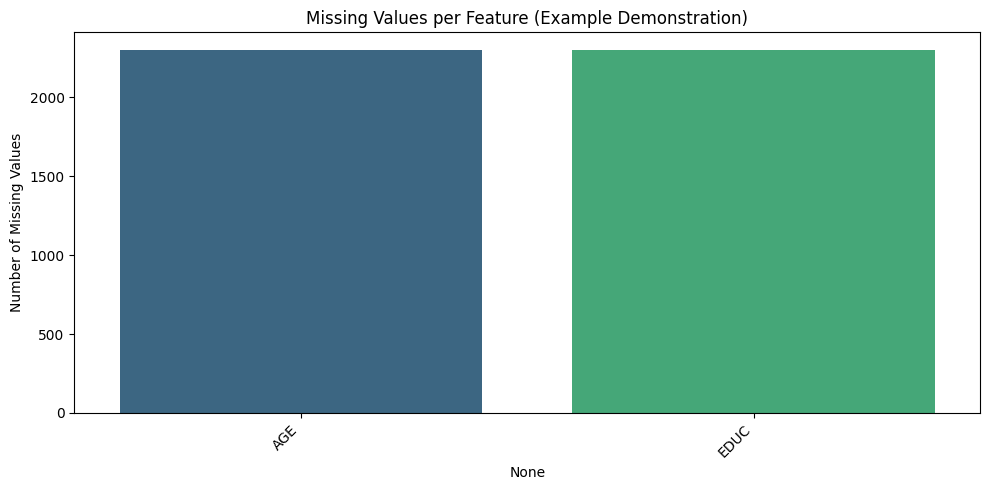

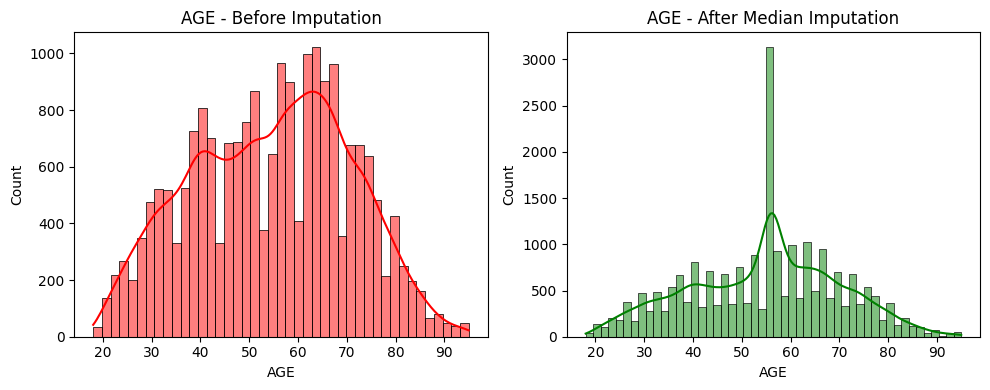

C:\Users\anees\AppData\Local\Temp\ipykernel_22620\3728677833.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_demo[categorical_feature], palette="Reds")
C:\Users\anees\AppData\Local\Temp\ipykernel_22620\3728677833.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_imputed_categorical, palette="Greens")


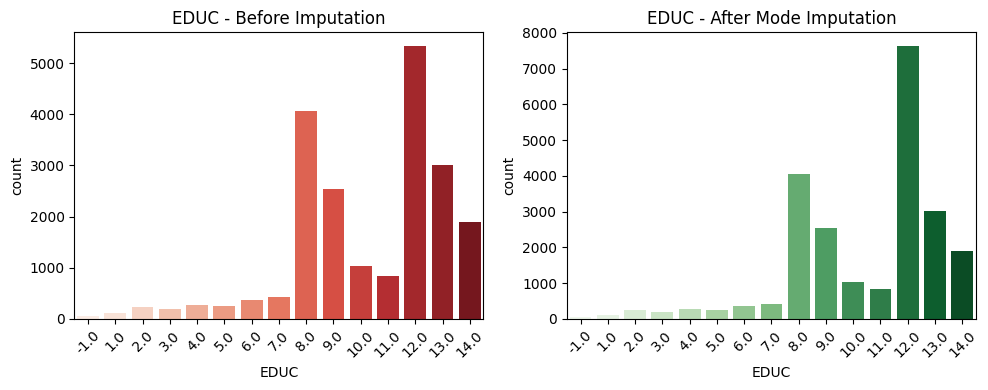

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Choose any numeric and categorical feature from your dataset
numeric_feature = 'AGE'          # a numeric column name from my dataset
categorical_feature = 'EDUC'     # a categorical column name from my dataset

# Make copies to simulate missing values for demonstration
df_demo = df.copy()

# Randomly set 10% of values in chosen columns to NaN
df_demo.loc[df_demo.sample(frac=0.1, random_state=42).index, numeric_feature] = None
df_demo.loc[df_demo.sample(frac=0.1, random_state=42).index, categorical_feature] = None

# 1. Missing values count plot
missing_counts = df_demo.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Missing Values")
plt.title("Missing Values per Feature (Example Demonstration)")
plt.tight_layout()
plt.show()

# 2. Numeric feature before/after median imputation
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df_demo[numeric_feature], kde=True, color='red')
plt.title(f"{numeric_feature} - Before Imputation")

median_value = df_demo[numeric_feature].median()
df_imputed_numeric = df_demo[numeric_feature].fillna(median_value)

plt.subplot(1,2,2)
sns.histplot(df_imputed_numeric, kde=True, color='green')
plt.title(f"{numeric_feature} - After Median Imputation")
plt.tight_layout()
plt.show()

# 3. Categorical feature before/after mode imputation
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x=df_demo[categorical_feature], palette="Reds")
plt.title(f"{categorical_feature} - Before Imputation")
plt.xticks(rotation=45)

mode_value = df_demo[categorical_feature].mode()[0]
df_imputed_categorical = df_demo[categorical_feature].fillna(mode_value)

plt.subplot(1,2,2)
sns.countplot(x=df_imputed_categorical, palette="Greens")
plt.title(f"{categorical_feature} - After Mode Imputation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [3]:

# --------------------------------------------
# STEP 2: Select Key Variables for Debt Analysis
# --------------------------------------------

# We'll use a refined selection of variables that actually exist in the dataset
selected_columns = [
    'INCOME',     # Total household income
    'AGE',        # Age of household head
    'EDUC',       # Education level
    'MARRIED',    # Marital status
    'RACE',       # Race of respondent
    'LATE',       # Indicator for late credit card payment
    'LATE60'      # Indicator for 60+ days late
]

# Extract only those columns and rename for clarity
df_selected = df[selected_columns].copy()
df_selected.rename(columns={
    'INCOME': 'income',
    'AGE': 'age',
    'EDUC': 'education',
    'MARRIED': 'marital_status',
    'RACE': 'race',
    'LATE': 'late_payment',
    'LATE60': 'late_60_days'
}, inplace=True)


In [4]:

# --------------------------------------------
# STEP 3: Clean the Data
# --------------------------------------------

# Fill missing values: numeric with 0, categorical with mode
for col in df_selected.columns:
    if df_selected[col].dtype == 'object':
        df_selected[col].fillna(df_selected[col].mode()[0], inplace=True)
    else:
        df_selected[col].fillna(0, inplace=True)

# Convert late_payment to integer for plotting
df_selected['late_payment'] = df_selected['late_payment'].astype(int)



C:\Users\anees\AppData\Local\Temp\ipykernel_22620\1966898320.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected[col].fillna(0, inplace=True)


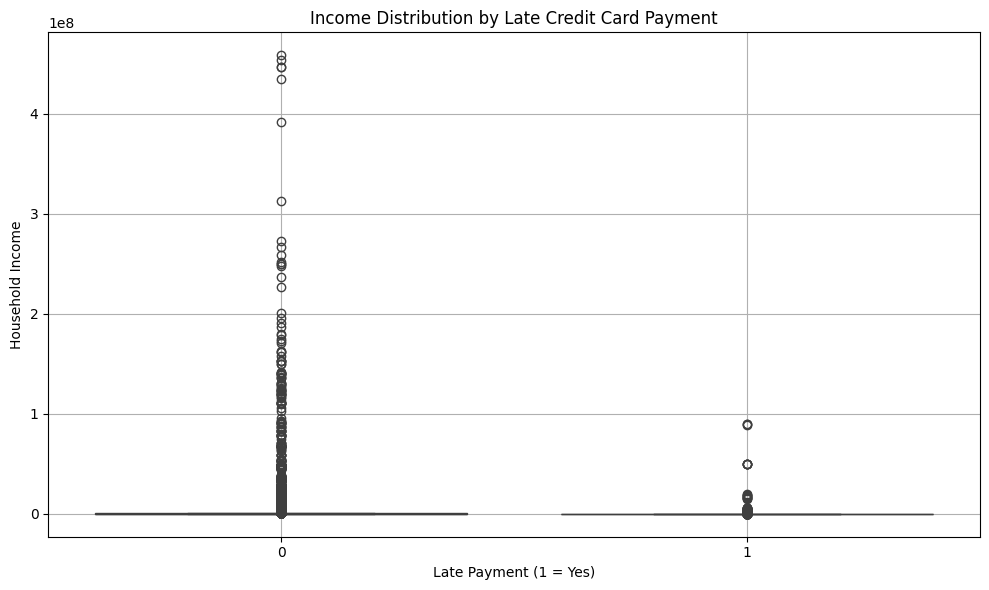


Cleaned Subset (First 10 Rows):
          income  age  education  marital_status  race  late_payment  \
0   38804.734469   70          9               2     1             0   
1   38264.278557   70          9               2     1             0   
2   36102.454910   70          9               2     1             0   
3   33508.266533   70          9               2     1             0   
4   35561.998998   70          9               2     1             0   
5  224829.659320   46         12               2     1             0   
6  224829.659320   46         12               2     1             0   
7  224829.659320   46         12               2     1             0   
8  224829.659320   46         12               2     1             0   
9  224829.659320   46         12               2     1             0   

   late_60_days  
0             0  
1             0  
2             0  
3             0  
4             0  
5             0  
6             0  
7             0  
8           

In [5]:
# --------------------------------------------
# STEP 4: Basic Exploratory Data Analysis (EDA)
# --------------------------------------------

# Plot income distribution based on late payment status
plt.figure(figsize=(10, 6))
sns.boxplot(x='late_payment', y='income', data=df_selected)
plt.title('Income Distribution by Late Credit Card Payment')
plt.xlabel('Late Payment (1 = Yes)')
plt.ylabel('Household Income')
plt.grid(True)
plt.tight_layout()
plt.show()

# Preview cleaned dataset
print("\nCleaned Subset (First 10 Rows):")
print(df_selected.head(10))


In [6]:
# --------------------------------------------
# STEP 5: Add Valid SCF Debt Variables
# --------------------------------------------

# Add verified debt fields
df_selected['credit_card_balance'] = df['CCBAL'].fillna(0)
df_selected['mortgage_balance'] = df['MORT1'].fillna(0)
df_selected['student_loan_balance'] = df['RESDBT'].fillna(0)

# Use VEHIC (vehicle value) as a proxy for auto loan if actual auto debt not available
df_selected['auto_loan_proxy'] = df['VEHIC'].fillna(0)

# Create binary indicators
df_selected['has_credit_card_debt'] = (df_selected['credit_card_balance'] > 0).astype(int)
df_selected['has_mortgage'] = (df_selected['mortgage_balance'] > 0).astype(int)
df_selected['has_student_loan'] = (df_selected['student_loan_balance'] > 0).astype(int)
df_selected['has_auto_loan'] = (df_selected['auto_loan_proxy'] > 0).astype(int)


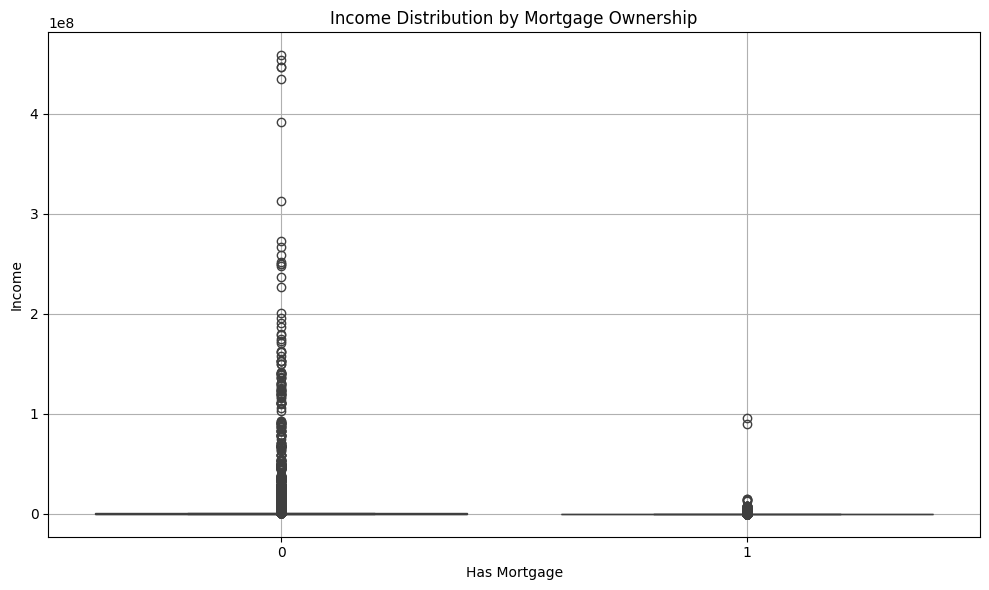

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='has_credit_card_debt', y='income', data=df_selected)
plt.title('Income Distribution by Mortgage Ownership')
plt.xlabel('Has Mortgage')
plt.ylabel('Income')
plt.grid(True)
plt.tight_layout()
plt.show()

###
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



# Optional manual overrides (leave as None to auto-detect)
OVERRIDE = {
    "debt_flag": None,   # e.g., "has_credit_card_debt"
    "income":    None,   # e.g., "income"
    "education": None,   # e.g., "education"
    "age":       None,   # e.g., "age"
    "house_val": None,   # e.g., "house_value"
    "liab":      None,   # e.g., "total_liabilities"
}

# ==== No edits needed below ====
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


DEBT_FLAG = "has_credit_card_debt" # <-- change if your column is named differently

# Known columns from your list
COL_INCOME = "INCOME"
COL_EDUC   = "EDUC"
COL_AGE    = "AGE"


# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# cols = set(df.columns)

# def have(*names):
#     return all(n in cols for n in names)

# # Ensure education is categorical for countplot readability
# if COL_EDUC in cols:
#     if not (pd.api.types.is_string_dtype(df[COL_EDUC]) or pd.api.types.is_categorical_dtype(df[COL_EDUC])):
#         df[COL_EDUC] = df[COL_EDUC].astype(str)

# # 1) Boxplot – income by debt flag
# if have(DEBT_FLAG, COL_INCOME):
#     plt.figure(figsize=(8,6))
#     sns.boxplot(x=df[DEBT_FLAG].astype(str), y=df[COL_INCOME])
#     plt.title("Income Distribution by Credit Card Debt Ownership")
#     plt.xlabel(f"{DEBT_FLAG} (0 = No, 1 = Yes)")
#     plt.ylabel(COL_INCOME)
#     plt.tight_layout()
#     plt.savefig("boxplot_income_by_debt.png", dpi=300, bbox_inches="tight")
#     plt.show()
# else:
#     print(f"Skipping boxplot: need columns '{DEBT_FLAG}' and '{COL_INCOME}'.")

# # 2) Heatmap – pick available numeric columns (prioritize INCOME/AGE)
# num_cols = df.select_dtypes(include="number").columns.tolist()
# heat_cols = [c for c in [COL_INCOME, COL_AGE] if c in num_cols]
# # add a few extra numerics for context
# for c in num_cols:
#     if c not in heat_cols:
#         heat_cols.append(c)
#     if len(heat_cols) >= 6:
#         break

# if len(heat_cols) >= 3:
#     plt.figure(figsize=(10,8))
#     corr = df[heat_cols].corr(numeric_only=True)
#     sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
#     plt.title("Correlation Heatmap of Key Numeric Features")
#     plt.tight_layout()
#     plt.savefig("heatmap_correlations.png", dpi=300, bbox_inches="tight")
#     plt.show()
# else:
#     print("Skipping heatmap: need at least 3 numeric columns.")

# # 3a) Class imbalance – debt flag countplot
# if DEBT_FLAG in cols:
#     plt.figure(figsize=(6,4))
#     sns.countplot(x=df[DEBT_FLAG].astype(str))
#     plt.title("Class Distribution: Credit Card Debt Ownership")
#     plt.xlabel(f"{DEBT_FLAG} (0 = No, 1 = Yes)")
#     plt.ylabel("Count")
#     plt.tight_layout()
#     plt.savefig("countplot_debt_flag.png", dpi=300, bbox_inches="tight")
#     plt.show()
# else:
#     print(f"Skipping debt flag countplot: '{DEBT_FLAG}' not found.")

# # 3b) Categorical frequency – EDUC
# if COL_EDUC in cols:
#     vc = df[COL_EDUC].astype(str).value_counts()
#     keep = set(vc.head(12).index)
#     plot_series = df[COL_EDUC].astype(str).where(df[COL_EDUC].astype(str).isin(keep), "Other")
#     plt.figure(figsize=(9,5))
#     sns.countplot(x=plot_series)
#     plt.title("Education Level Frequency")
#     plt.xlabel(COL_EDUC)
#     plt.ylabel("Count")
#     plt.xticks(rotation=45, ha="right")
#     plt.tight_layout()
#     plt.savefig("countplot_education.png", dpi=300, bbox_inches="tight")
#     plt.show()
# else:
#     print(f"Skipping education countplot: '{COL_EDUC}' not found.")

# # 4) Pairplot – INCOME & AGE with debt flag as hue
# pair_cols = [c for c in [COL_INCOME, COL_AGE] if c in cols]
# if len(pair_cols) >= 2 and DEBT_FLAG in cols:
#     plot_df = df[pair_cols + [DEBT_FLAG]].dropna()
#     if len(plot_df) > 5000:
#         plot_df = plot_df.sample(5000, random_state=42)
#     plot_df[DEBT_FLAG] = plot_df[DEBT_FLAG].astype(str)
#     g = sns.pairplot(plot_df, vars=pair_cols, hue=DEBT_FLAG, diag_kind="kde")
#     g.fig.suptitle("Pairplot of Demographics and Credit Card Debt Ownership", y=1.02)
#     plt.savefig("pairplot_income_age.png", dpi=300, bbox_inches="tight")
#     plt.show()
# else:
#     print("Skipping pairplot: need INCOME, AGE, and the debt flag column.")

# print("\nSaved figures (if created):")
# print("  boxplot_income_by_debt.png")
# print("  heatmap_correlations.png")
# print("  countplot_debt_flag.png")
# print("  countplot_education.png")
# print("  pairplot_income_age.png")



In [8]:

df['has_credit_card_debt'] = (df['CCBAL'] > 0).astype(int)

# Check class balance
print("Class Balance (Credit Card Debt):")
print(df['has_credit_card_debt'].value_counts(normalize=True))

# Select relevant features for analysis
relevant_features = [
    'INCOME',      # Income
    'AGE',         # Age
    'EDUC',        # Education
    'MARRIED',     # Marital status
    'EMPLOYED',    # Employment status
    'SAVING',      # Savings
    'DEBT',        # Total debt
    'NETWORTH'     # Net worth
]

# Create feature matrix X (select only features that exist in your dataset)
X = df[[col for col in relevant_features if col in df.columns]]

# Target variable
y = df['has_credit_card_debt']

# Handle missing values if any
X = X.fillna(X.mean())

# Print summary of selected features
print("\nFeature Summary:")
print(X.describe())

# Check class balance
print("Available columns:")
print(df.columns.tolist())
#print("Class Balance:")
#print(df['has_credit_card_debt'].value_counts(normalize=True))



Class Balance (Credit Card Debt):
has_credit_card_debt
0    0.621589
1    0.378411
Name: proportion, dtype: float64

Feature Summary:
             INCOME           AGE          EDUC       MARRIED        SAVING  \
count  2.297500e+04  22975.000000  22975.000000  22975.000000  2.297500e+04   
mean   1.592855e+06     54.468988     10.328400      1.367791  1.632283e+05   
std    1.244271e+07     16.189081      2.815743      0.482215  3.970053e+06   
min    0.000000e+00     18.000000     -1.000000      1.000000  0.000000e+00   
25%    4.215556e+04     42.000000      8.000000      1.000000  0.000000e+00   
50%    9.403933e+04     56.000000     11.000000      1.000000  0.000000e+00   
75%    2.648234e+05     67.000000     12.000000      2.000000  1.400000e+04   
max    4.582309e+08     95.000000     14.000000      2.000000  2.600000e+08   

               DEBT      NETWORTH  
count  2.297500e+04  2.297500e+04  
mean   3.606429e+05  1.995640e+07  
std    2.544356e+06  1.101707e+08  
min    0.0

has_credit_card_debt
0    0.621589
1    0.378411
Name: proportion, dtype: float64


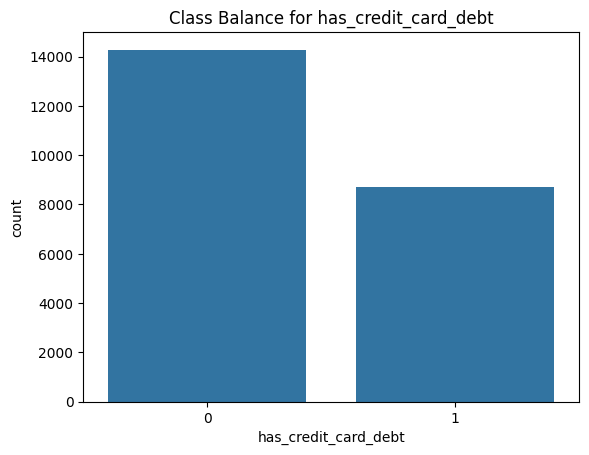


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2834
           1       1.00      0.88      0.94      1761

    accuracy                           0.95      4595
   macro avg       0.97      0.94      0.95      4595
weighted avg       0.96      0.95      0.95      4595


Cluster Summaries:

Cluster 0 Summary:
income                  2.868939e+06
age                     5.307002e+02
education               4.971061e+02
marital_status          4.916399e+02
race                    4.922400e+02
late_payment            4.907475e+02
late_60_days            4.905766e+02
credit_card_balance     1.934949e+04
mortgage_balance        4.903750e+02
student_loan_balance    1.917302e+04
auto_loan_proxy         2.409019e+04
has_mortgage            4.903750e+02
has_student_loan        4.905046e+02
has_auto_loan           4.907345e+02
Cluster                 4.903750e+02
dtype: float64

Cluster 1 Summary:
income       

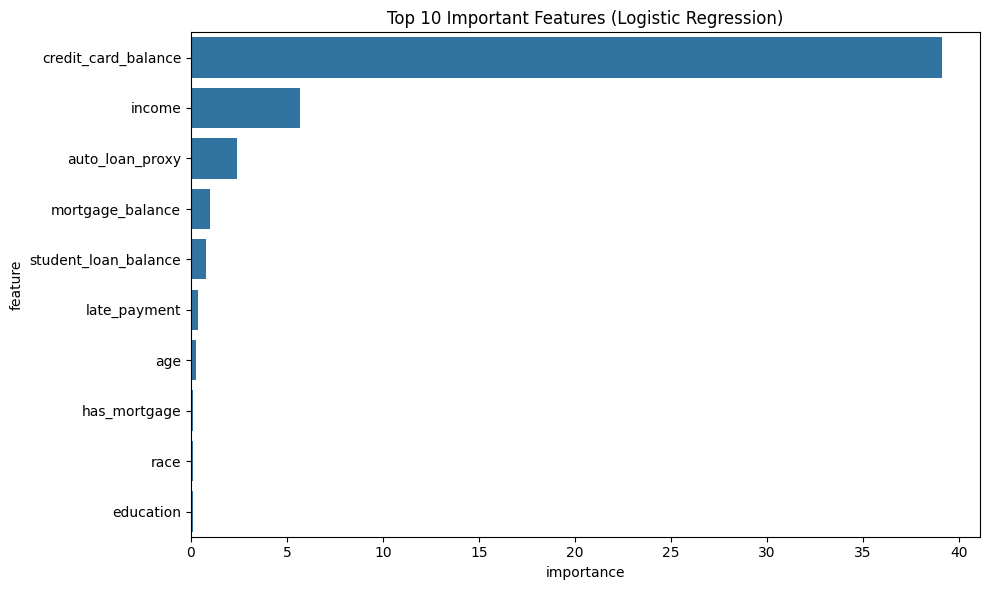

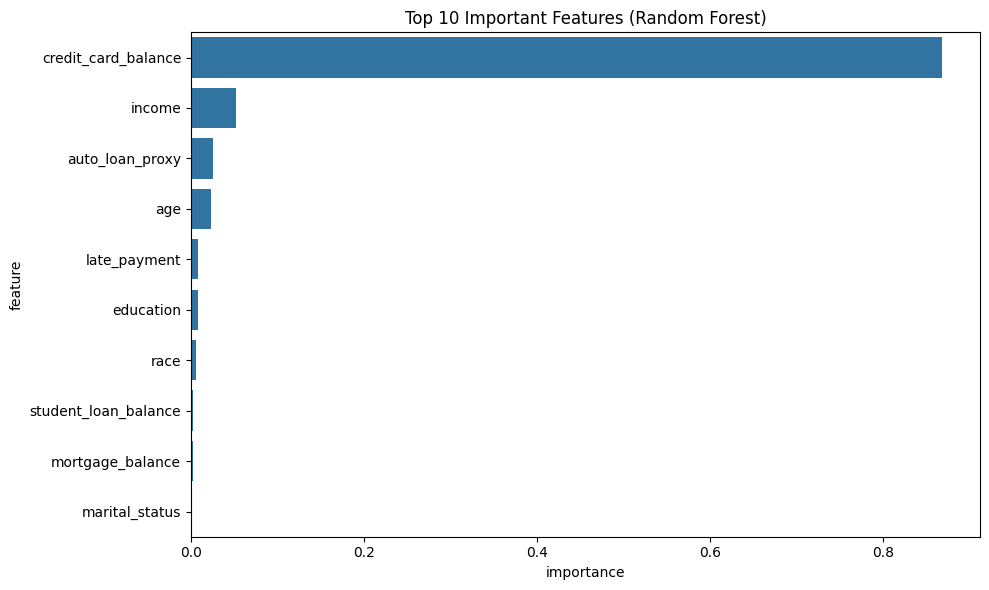

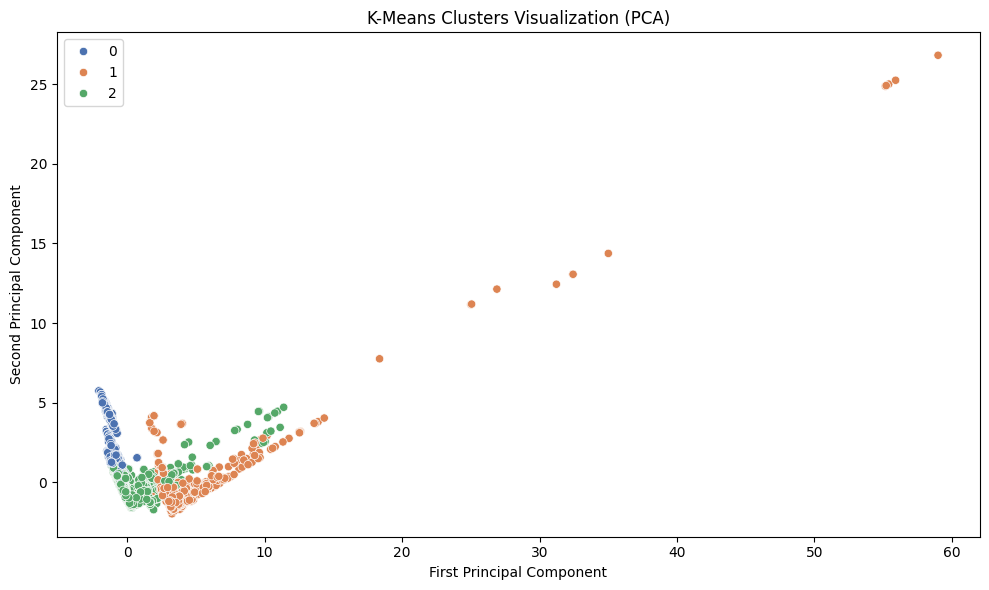

In [9]:
# Prepare features and target
X = df_selected.drop('has_credit_card_debt', axis=1)
y = df_selected['has_credit_card_debt']

# Calculate class weights
class_weights = dict(zip(
y.unique(),
[len(y) / (len(np.unique(y)) * np.bincount(y)[i]) for i in np.unique(y)]))

print(y.value_counts(normalize=True))
sns.countplot(x=y)
plt.title('Class Balance for has_credit_card_debt')
plt.show()


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with class weights
lr_model = LogisticRegression(class_weight=class_weights, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = lr_model.predict(X_test_scaled)
print("\nLogistic Regression Results:")
print(classification_report(y_test, y_pred))

# Feature importance for Logistic Regression
lr_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(lr_model.coef_[0])
})
lr_importance = lr_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=lr_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Important Features (Logistic Regression)')
plt.tight_layout()

#  Random Forest
rf_model = RandomForestClassifier(class_weight=class_weights, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Random Forest feature importance
rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
rf_importance = rf_importance.sort_values('importance', ascending=False)

# Plot Random Forest feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=rf_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Important Features (Random Forest)')
plt.tight_layout()

# K-Means Clustering with PCA
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_train_scaled)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='deep')
plt.title('K-Means Clusters Visualization (PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.tight_layout()

# Cluster summaries
df_train = pd.DataFrame(X_train, columns=X.columns)
df_train['Cluster'] = cluster_labels

print("\nCluster Summaries:")
for cluster in range(3):
    print(f"\nCluster {cluster} Summary:")
    print(df_train[df_train['Cluster'] == cluster].describe().mean())


Distribution of Late Payment Categories:
late_payment_category
On Time           20395
1-60 days late     1523
60+ days late      1057
Name: count, dtype: int64

Percentage Distribution:
late_payment_category
On Time           88.770403
1-60 days late     6.628945
60+ days late      4.600653
Name: proportion, dtype: float64


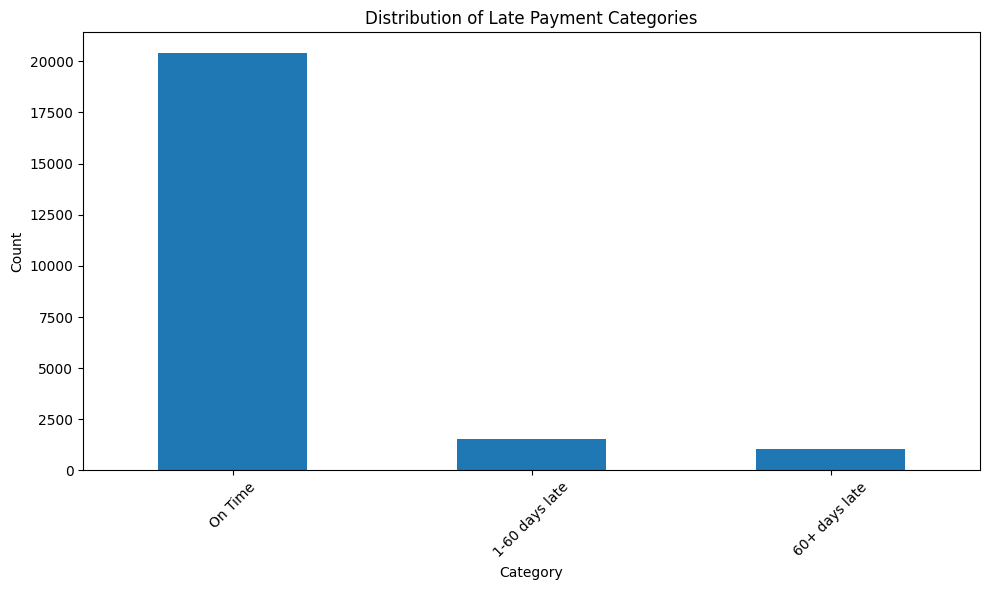

In [10]:
# Create late payment categories using LATE and LATE60 columns
def classify_late_payments(row):
    if row['LATE'] == 0:  # Assuming 0 means no late payments
        return 'On Time'
    elif row['LATE'] == 1 and row['LATE60'] == 0:  # Late but not over 60 days
        return '1-60 days late'
    else:  # Late60 == 1, meaning 60+ days late
        return '60+ days late'

# Create a new column with the classification
df['late_payment_category'] = df.apply(classify_late_payments, axis=1)

# Display the distribution of late payment categories
print("\nDistribution of Late Payment Categories:")
print(df['late_payment_category'].value_counts())
print("\nPercentage Distribution:")
print(df['late_payment_category'].value_counts(normalize=True) * 100)

# Create a bar plot to visualize the distribution
plt.figure(figsize=(10, 6))
df['late_payment_category'].value_counts().plot(kind='bar')
plt.title('Distribution of Late Payment Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# For Logistic Regression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression Evaluation
y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

# Random Forest Evaluation
y_pred_rf = rf_model.predict(X_test_scaled)
print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Logistic Regression Metrics:
Accuracy: 0.9550

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2834
           1       1.00      0.88      0.94      1761

    accuracy                           0.95      4595
   macro avg       0.97      0.94      0.95      4595
weighted avg       0.96      0.95      0.95      4595


Confusion Matrix:
[[2832    2]
 [ 205 1556]]

Random Forest Metrics:
Accuracy: 1.0000

Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2834
           1       1.00      1.00      1.00      1761

    accuracy                           1.00      4595
   macro avg       1.00      1.00      1.00      4595
weighted avg       1.00      1.00      1.00      4595


Confusion Matrix:
[[2834    0]
 [   0 1761]]


In [12]:
# K-Means Evaluation
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calculate clustering metrics
silhouette = silhouette_score(X_train_scaled, cluster_labels)
ch_score = calinski_harabasz_score(X_train_scaled, cluster_labels)
db_score = davies_bouldin_score(X_train_scaled, cluster_labels)

print("K-Means Clustering Metrics:")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Score: {ch_score:.4f}")
print(f"Davies-Bouldin Score: {db_score:.4f}")

# Interpretation:
print("\nInterpretation:")
print("- Silhouette Score: ranges from -1 to 1, higher is better")
print("- Calinski-Harabasz Score: higher is better")
print("- Davies-Bouldin Score: lower is better")

K-Means Clustering Metrics:
Silhouette Score: 0.3040
Calinski-Harabasz Score: 2866.3795
Davies-Bouldin Score: 1.7612

Interpretation:
- Silhouette Score: ranges from -1 to 1, higher is better
- Calinski-Harabasz Score: higher is better
- Davies-Bouldin Score: lower is better


In [13]:


# Read the CSV file
df_cleaned = pd.read_csv(r"C:\Users\anees\Desktop\MScDataScienceandAnalytics\3rd Sem\DMV Cleaned Dataset.csv")

# Display the column names
print("Available columns in the dataset:")
print(df_cleaned.columns.tolist())

Available columns in the dataset:
['Total Loan Amount', 'Average Interest Rate', 'state', 'zip_code']


In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score



# Load your data

df = pd.read_csv(r"C:\Users\anees\Desktop\MScDataScienceandAnalytics\3rd Sem\DMV Cleaned Dataset.csv")

# Select features for clustering
features = ['Total Loan Amount', 'Average Interest Rate']
X = df[features]

# Handle any missing values
X = X.fillna(X.mean())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load your Excel data
print("Starting data loading...")
df = pd.read_csv(r"C:\Users\anees\Desktop\MScDataScienceandAnalytics\3rd Sem\DMV Cleaned Dataset.csv")
print("Data loaded successfully.")
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {len(df)}")

# Select features for clustering
features = ['Total Loan Amount', 'Average Interest Rate']
X = df[features]

# Handle any missing values
X = X.fillna(X.mean())

# Scale the features
print("Starting scaling...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Scaling complete.")

# Initialize and fit MiniBatchKMeans for faster processing on large data
print("Starting KMeans fitting...")
n_clusters = 3  # You can adjust this number based on your needs
kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, batch_size=1000)
cluster_labels = kmeans.fit_predict(X_scaled)
print("Fitting complete.")

# For metrics, use a random sample to speed up calculation (adjust sample_size as needed)
print("Starting metrics calculation on sample...")
sample_size = min(1000, len(X_scaled))  # Use up to 1000 points for metrics
sample_indices = np.random.choice(len(X_scaled), sample_size, replace=False)
X_sample = X_scaled[sample_indices]
labels_sample = cluster_labels[sample_indices]

silhouette = silhouette_score(X_sample, labels_sample)
ch_score = calinski_harabasz_score(X_sample, labels_sample)
db_score = davies_bouldin_score(X_sample, labels_sample)
print("Metrics calculation complete.")

# Print evaluation metrics
print("K-Means Clustering Metrics (on sample):")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Score: {ch_score:.4f}")
print(f"Davies-Bouldin Score: {db_score:.4f}")

# Add cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

# Print cluster statistics
print("\nCluster Statistics:")
print(df.groupby('Cluster')[features].mean())



Starting data loading...
Data loaded successfully.
Dataset shape: (1048575, 4)
Number of rows: 1048575
Starting scaling...
Scaling complete.
Starting KMeans fitting...
Fitting complete.
Starting metrics calculation on sample...
Metrics calculation complete.
K-Means Clustering Metrics (on sample):
Silhouette Score: 0.4010
Calinski-Harabasz Score: 746.5409
Davies-Bouldin Score: 0.8747

Cluster Statistics:
         Total Loan Amount  Average Interest Rate
Cluster                                          
0             10080.479434               9.993483
1             27917.969747              12.360733
2             13220.771516              18.772041


In [16]:

print("\nCluster Statistics:")
print(df.groupby('Cluster')[features].mean())


Cluster Statistics:
         Total Loan Amount  Average Interest Rate
Cluster                                          
0             10080.479434               9.993483
1             27917.969747              12.360733
2             13220.771516              18.772041


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the new dataset (sample to handle large size)
print('Starting data loading...')
df = pd.read_csv(r"C:\Users\anees\Desktop\MScDataScienceandAnalytics\3rd Sem\DMV Cleaned Dataset.csv")
df = df.sample(n=10000, random_state=42)  # Sample for efficiency; adjust as needed
print('Data loaded successfully. Dataset shape:', df.shape)

# Derive binary target: high_interest_loan (1 if above median interest rate, 0 otherwise)
median_interest = df['Average Interest Rate'].median()
df['high_interest_loan'] = np.where(df['Average Interest Rate'] > median_interest, 1, 0)
print('Target derived. Class distribution:\n', df['high_interest_loan'].value_counts(normalize=True))

# Features and target
features = ['Total Loan Amount', 'state', 'zip_code']  # Using these; adjust if needed
target = 'high_interest_loan'
X = df[features]
y = df[target]

# Calculate class weights for imbalance
class_weights = {0: len(y) / (2 * np.bincount(y)[0]), 1: len(y) / (2 * np.bincount(y)[1])}

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Data split complete.')

# Preprocessing pipeline
numeric_features = ['Total Loan Amount']
categorical_features = ['state', 'zip_code']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# Logistic Regression pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(class_weight=class_weights, random_state=42))])
print('Starting Logistic Regression training...')
lr_pipeline.fit(X_train, y_train)
print('Training complete.')

# Evaluate
y_pred_lr = lr_pipeline.predict(X_test)
print('\nLogistic Regression Results:')
print(classification_report(y_test, y_pred_lr))

# Feature importance (coefficients)
feature_names = numeric_features + list(lr_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))
lr_importance = pd.DataFrame({'feature': feature_names, 'importance': np.abs(lr_pipeline.named_steps['classifier'].coef_[0])})
lr_importance = lr_importance.sort_values('importance', ascending=False).head(10)
print('Top 10 LR Features:\n', lr_importance)

# Random Forest pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(class_weight=class_weights, random_state=42, n_jobs=-1))])
print('Starting Random Forest training...')
rf_pipeline.fit(X_train, y_train)
print('Training complete.')

# Evaluate
y_pred_rf = rf_pipeline.predict(X_test)
print('\nRandom Forest Results:')
print(classification_report(y_test, y_pred_rf))

# Feature importance
rf_importance = pd.DataFrame({'feature': feature_names, 'importance': rf_pipeline.named_steps['classifier'].feature_importances_})
rf_importance = rf_importance.sort_values('importance', ascending=False).head(10)
print('Top 10 RF Features:\n', rf_importance)



Starting data loading...
Data loaded successfully. Dataset shape: (10000, 4)
Target derived. Class distribution:
 high_interest_loan
0    0.5102
1    0.4898
Name: proportion, dtype: float64
Data split complete.
Starting Logistic Regression training...
Training complete.

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.55      0.58      0.56      1023
           1       0.53      0.50      0.51       977

    accuracy                           0.54      2000
   macro avg       0.54      0.54      0.54      2000
weighted avg       0.54      0.54      0.54      2000

Top 10 LR Features:
             feature  importance
412  zip_code_439xx    1.285771
346  zip_code_356xx    1.268575
378  zip_code_391xx    1.261543
310  zip_code_313xx    1.242716
364  zip_code_376xx    1.234828
183  zip_code_165xx    1.218604
569  zip_code_657xx    1.208399
276  zip_code_277xx    1.199313
749  zip_code_904xx    1.169364
295  zip_code_297xx    1.124456

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

=== SHAP Analysis for DMV Dataset ===
Using 100 samples for SHAP analysis

Logistic Regression - DMV Dataset:
Generating SHAP values for Logistic Regression...
SHAP values generated in 0.02 seconds
Top 10 SHAP Features - Logistic Regression (DMV):
               feature  shap_importance                model
0    Total Loan Amount         0.101311  Logistic Regression
5             state_CA         0.036754  Logistic Regression
564     zip_code_652xx         0.022235  Logistic Regression
23            state_MN         0.020876  Logistic Regression
24            state_MO         0.019869  Logistic Regression
523     zip_code_600xx         0.019843  Logistic Regression
34            state_NY         0.016156  Logistic Regression
43            state_TX         0.015187  Logistic Regression
282     zip_code_283xx         0.014841  Logistic Regression
413     zip_code_440xx         0.014614  Logistic Regression


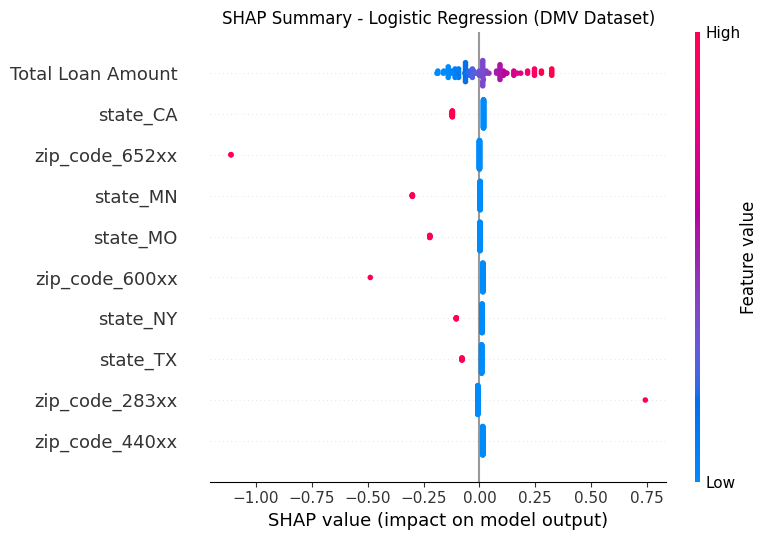


Random Forest - DMV Dataset:
Generating SHAP values for Random Forest using KernelExplainer...


  0%|          | 0/50 [00:00<?, ?it/s]

SHAP values generated in 103.12 seconds

Top 10 SHAP Features - Random Forest (DMV):
               feature  shap_importance          model
0    Total Loan Amount         0.111268  Random Forest
778     zip_code_935xx         0.012529  Random Forest
23            state_MN         0.011673  Random Forest
276     zip_code_277xx         0.010214  Random Forest
5             state_CA         0.009000  Random Forest
690     zip_code_805xx         0.008658  Random Forest
687     zip_code_802xx         0.008406  Random Forest
326     zip_code_330xx         0.007865  Random Forest
6             state_CO         0.007797  Random Forest
769     zip_code_925xx         0.006630  Random Forest


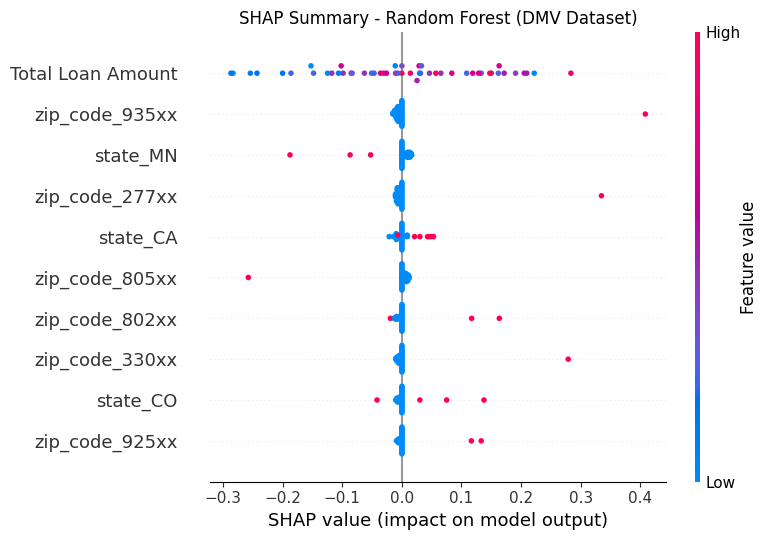

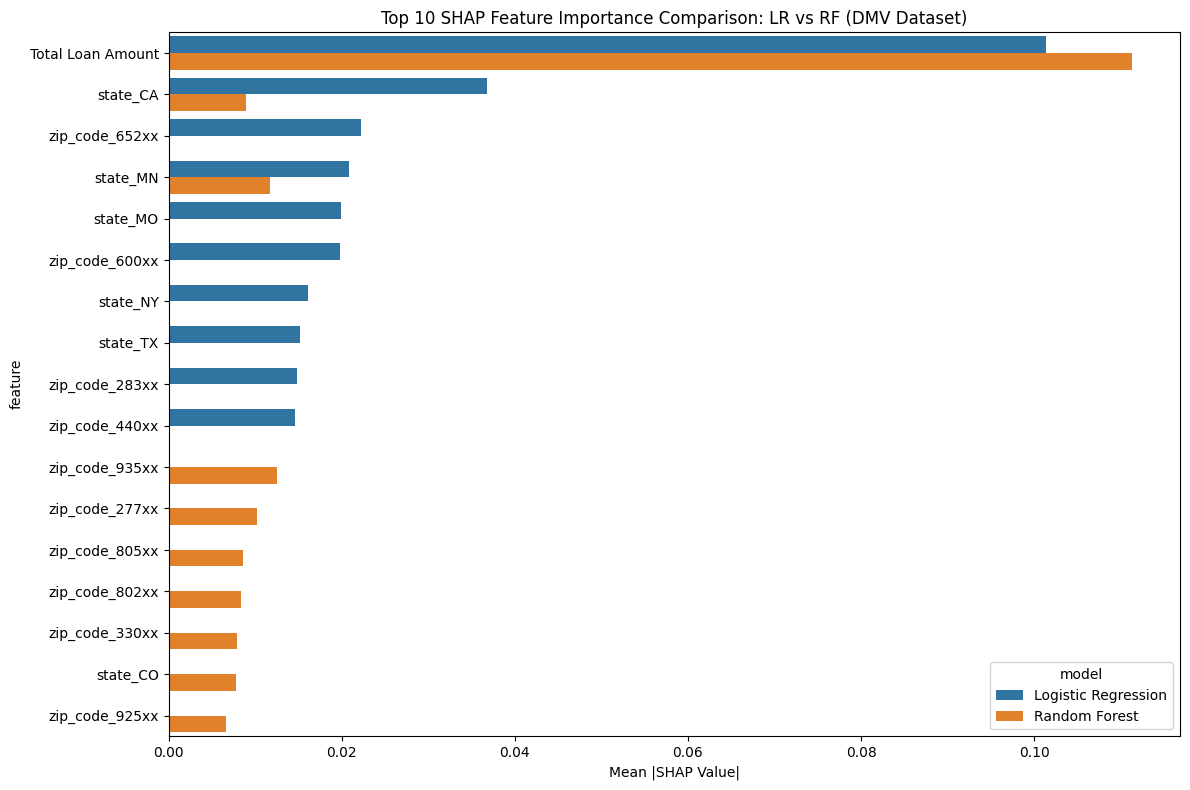


SHAP analysis completed successfully!


In [19]:
# Install required packages
!pip install ipywidgets

import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import seaborn as sns

# SHAP Analysis for DMV Models (current dataset)
print("=== SHAP Analysis for DMV Dataset ===")

# Use a very small sample for faster processing
sample_size = 100  # Reduce to just 100 samples
sample_indices = np.random.choice(X_test.shape[0], sample_size, replace=False)
X_test_sample = X_test.iloc[sample_indices]
y_test_sample = y_test.iloc[sample_indices]

print(f"Using {sample_size} samples for SHAP analysis")

# Transform the sample data once and reuse
X_test_sample_transformed = lr_pipeline.named_steps['preprocessor'].transform(X_test_sample)

# For Logistic Regression (DMV)
try:
    print("\nLogistic Regression - DMV Dataset:")
    start_time = time.time()
    print("Generating SHAP values for Logistic Regression...")
    explainer_lr_dmv = shap.LinearExplainer(lr_pipeline.named_steps['classifier'], 
                                          lr_pipeline.named_steps['preprocessor'].transform(X_train[:1000]))
    shap_values_lr_dmv = explainer_lr_dmv.shap_values(X_test_sample_transformed)
    print(f"SHAP values generated in {time.time() - start_time:.2f} seconds")
    
    # Feature importance for LR
    shap_importance_lr_dmv = pd.DataFrame({
        'feature': feature_names,
        'shap_importance': np.abs(shap_values_lr_dmv).mean(0),
        'model': 'Logistic Regression'
    }).sort_values('shap_importance', ascending=False)
    
    print("Top 10 SHAP Features - Logistic Regression (DMV):")
    print(shap_importance_lr_dmv.head(10))
    
    # Summary plot for LR (DMV)
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values_lr_dmv,
                    X_test_sample_transformed,
                    feature_names=feature_names,
                    show=False,
                    max_display=10)  # Limit to top 10 features
    plt.title('SHAP Summary - Logistic Regression (DMV Dataset)')
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error in Logistic Regression SHAP analysis: {e}")

# For Random Forest (DMV) - use KernelExplainer with very small sample
try:
    print("\nRandom Forest - DMV Dataset:")
    start_time = time.time()
    print("Generating SHAP values for Random Forest using KernelExplainer...")
    
    # Use a very small subset for KernelExplainer (just 50 samples)
    tiny_sample = X_test_sample_transformed[:50]
    
    # Use KernelExplainer instead of TreeExplainer
    def rf_predict(x):
        return rf_pipeline.named_steps['classifier'].predict_proba(x)[:,1]
    
    explainer_rf_dmv = shap.KernelExplainer(rf_predict, tiny_sample)
    shap_values_rf_dmv = explainer_rf_dmv.shap_values(tiny_sample)
    print(f"SHAP values generated in {time.time() - start_time:.2f} seconds")
    
    # Feature importance for RF
    shap_importance_rf_dmv = pd.DataFrame({
        'feature': feature_names,
        'shap_importance': np.abs(shap_values_rf_dmv).mean(0),
        'model': 'Random Forest'
    }).sort_values('shap_importance', ascending=False)
    
    print("\nTop 10 SHAP Features - Random Forest (DMV):")
    print(shap_importance_rf_dmv.head(10))
    
    # Summary plot for RF (DMV)
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values_rf_dmv,
                    tiny_sample,
                    feature_names=feature_names,
                    show=False,
                    max_display=10)  # Limit to top 10 features
    plt.title('SHAP Summary - Random Forest (DMV Dataset)')
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error in Random Forest SHAP analysis: {e}")

# Comparison visualization (only if both analyses succeeded)
if 'shap_importance_lr_dmv' in locals() and 'shap_importance_rf_dmv' in locals():
    try:
        # Combine the data for comparison
        combined_importance = pd.concat([shap_importance_lr_dmv.head(10), 
                                       shap_importance_rf_dmv.head(10)])
        
        plt.figure(figsize=(12, 8))
        sns.barplot(data=combined_importance, x='shap_importance', y='feature', hue='model')
        plt.title('Top 10 SHAP Feature Importance Comparison: LR vs RF (DMV Dataset)')
        plt.xlabel('Mean |SHAP Value|')
        plt.tight_layout()
        plt.show()
        
        print("\nSHAP analysis completed successfully!")
    except Exception as e:
        print(f"Error in comparison visualization: {e}")
else:
    print("\nSkipping comparison visualization due to errors in SHAP analyses")

=== SHAP Analysis for DMV Dataset ===

Logistic Regression - DMV Dataset:
Using 500 samples for SHAP analysis
Generating SHAP values for Logistic Regression...
SHAP values generated in 0.09 seconds


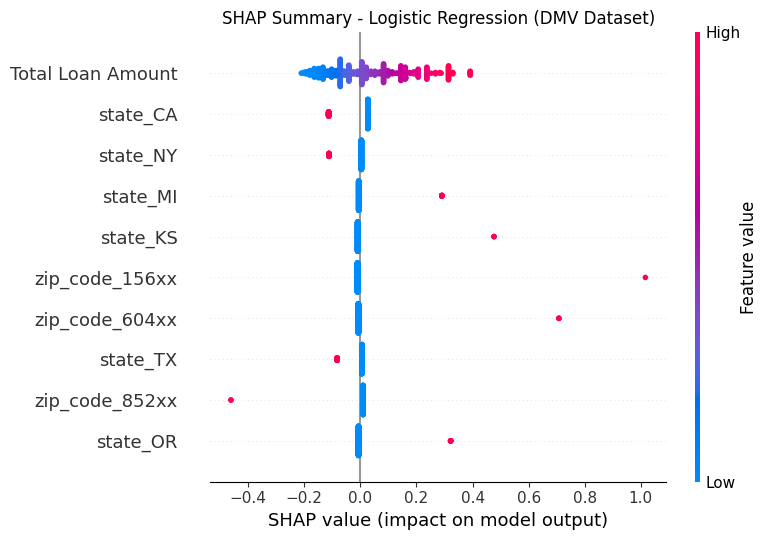

Top 10 SHAP Features - Logistic Regression (DMV):
               feature  shap_importance
0    Total Loan Amount         0.117755
5             state_CA         0.037960
34            state_NY         0.013876
22            state_MI         0.012749
16            state_KS         0.012521
175     zip_code_156xx         0.012275
526     zip_code_604xx         0.011354
43            state_TX         0.011332
721     zip_code_852xx         0.011224
37            state_OR         0.010982
Error in Logistic Regression SHAP analysis: waterfall() got an unexpected keyword argument 'feature_names'

Random Forest - DMV Dataset:
Generating SHAP values for Random Forest...
Error in Random Forest SHAP analysis: Only model_output="raw" is supported for feature_perturbation="tree_path_dependent"


<Figure size 1000x600 with 0 Axes>

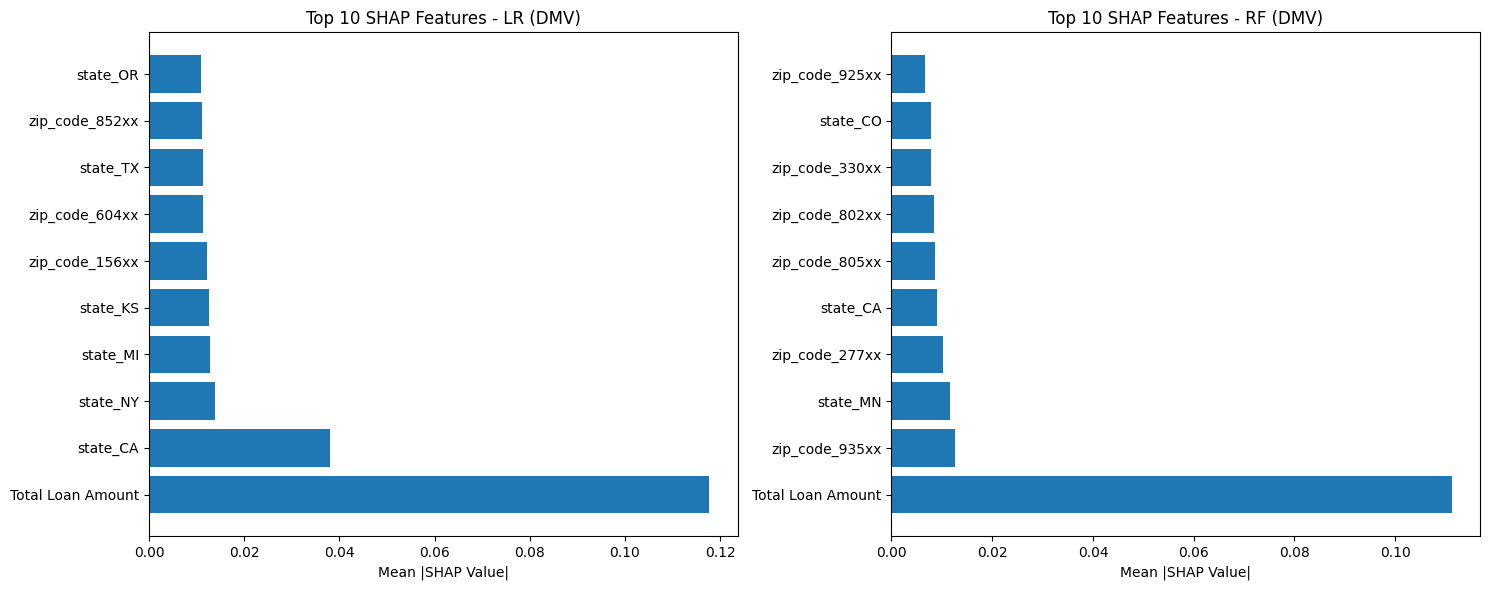


SHAP analysis completed successfully!


In [20]:

!pip install shap

import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

# SHAP Analysis for DMV Models (current dataset)
print("=== SHAP Analysis for DMV Dataset ===")

# For Logistic Regression (DMV)
print("\nLogistic Regression - DMV Dataset:")

# Use a sample of the data for faster processing
sample_size = min(500, X_test.shape[0])  # Limit to 500 samples
sample_indices = np.random.choice(X_test.shape[0], sample_size, replace=False)
X_test_sample = X_test.iloc[sample_indices]
y_test_sample = y_test.iloc[sample_indices]

print(f"Using {sample_size} samples for SHAP analysis")

# Transform the sample data once and reuse
X_test_sample_transformed = lr_pipeline.named_steps['preprocessor'].transform(X_test_sample)

# For Logistic Regression (DMV) - with timeout protection
try:
    start_time = time.time()
    print("Generating SHAP values for Logistic Regression...")
    explainer_lr_dmv = shap.LinearExplainer(lr_pipeline.named_steps['classifier'], 
                                          lr_pipeline.named_steps['preprocessor'].transform(X_train))
    shap_values_lr_dmv = explainer_lr_dmv.shap_values(X_test_sample_transformed)
    print(f"SHAP values generated in {time.time() - start_time:.2f} seconds")
    
    # Summary plot for LR (DMV)
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values_lr_dmv,
                    X_test_sample_transformed,
                    feature_names=feature_names,
                    show=False,
                    max_display=10)  # Limit to top 10 features
    plt.title('SHAP Summary - Logistic Regression (DMV Dataset)')
    plt.tight_layout()
    plt.show()
    
    # Feature importance for LR
    shap_importance_lr_dmv = pd.DataFrame({
        'feature': feature_names,
        'shap_importance': np.abs(shap_values_lr_dmv).mean(0)
    }).sort_values('shap_importance', ascending=False)
    
    print("Top 10 SHAP Features - Logistic Regression (DMV):")
    print(shap_importance_lr_dmv.head(10))
    
    # Waterfall plot for LR
    sample_idx = 0
    plt.figure(figsize=(10, 6))
    shap.waterfall_plot(explainer_lr_dmv.expected_value,
                      shap_values_lr_dmv[sample_idx],
                      X_test_sample_transformed[sample_idx],
                      feature_names=feature_names,
                      max_display=10,  # Limit to top 10 features
                      show=False)
    plt.title(f'SHAP Waterfall - LR Sample {sample_idx} (DMV)')
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error in Logistic Regression SHAP analysis: {e}")

# For Random Forest (DMV) - with timeout protection
try:
    start_time = time.time()
    print("\nRandom Forest - DMV Dataset:")
    print("Generating SHAP values for Random Forest...")
    
    # Use TreeExplainer with model_output="probability" for faster computation
    explainer_rf_dmv = shap.TreeExplainer(rf_pipeline.named_steps['classifier'], 
                                        model_output="probability")
    shap_values_rf_dmv = explainer_rf_dmv.shap_values(X_test_sample_transformed)
    print(f"SHAP values generated in {time.time() - start_time:.2f} seconds")
    
    # Summary plot for RF (DMV)
    plt.figure(figsize=(10, 6))
    # For binary classification, use class 1 (index 1 if shap_values is a list)
    if isinstance(shap_values_rf_dmv, list):
        shap_values_to_plot = shap_values_rf_dmv[1]
    else:
        shap_values_to_plot = shap_values_rf_dmv
        
    shap.summary_plot(shap_values_to_plot,
                    X_test_sample_transformed,
                    feature_names=feature_names,
                    show=False,
                    max_display=10)  # Limit to top 10 features
    plt.title('SHAP Summary - Random Forest (DMV Dataset)')
    plt.tight_layout()
    plt.show()
    
    # Feature importance for RF
    if isinstance(shap_values_rf_dmv, list):
        shap_importance_rf_dmv = pd.DataFrame({
            'feature': feature_names,
            'shap_importance': np.abs(shap_values_rf_dmv[1]).mean(0)
        }).sort_values('shap_importance', ascending=False)
    else:
        shap_importance_rf_dmv = pd.DataFrame({
            'feature': feature_names,
            'shap_importance': np.abs(shap_values_rf_dmv).mean(0)
        }).sort_values('shap_importance', ascending=False)
    
    print("\nTop 10 SHAP Features - Random Forest (DMV):")
    print(shap_importance_rf_dmv.head(10))
    
except Exception as e:
    print(f"Error in Random Forest SHAP analysis: {e}")

# Comparison visualization (only if both analyses succeeded)
if 'shap_importance_lr_dmv' in locals() and 'shap_importance_rf_dmv' in locals():
    try:
        # Comparison visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # LR SHAP importance
        top_lr_dmv = shap_importance_lr_dmv.head(10)
        ax1.barh(range(len(top_lr_dmv)), top_lr_dmv['shap_importance'])
        ax1.set_yticks(range(len(top_lr_dmv)))
        ax1.set_yticklabels(top_lr_dmv['feature'])
        ax1.set_title('Top 10 SHAP Features - LR (DMV)')
        ax1.set_xlabel('Mean |SHAP Value|')
        
        # RF SHAP importance
        top_rf_dmv = shap_importance_rf_dmv.head(10)
        ax2.barh(range(len(top_rf_dmv)), top_rf_dmv['shap_importance'])
        ax2.set_yticks(range(len(top_rf_dmv)))
        ax2.set_yticklabels(top_rf_dmv['feature'])
        ax2.set_title('Top 10 SHAP Features - RF (DMV)')
        ax2.set_xlabel('Mean |SHAP Value|')
        
        plt.tight_layout()
        plt.show()
        
        print("\nSHAP analysis completed successfully!")
    except Exception as e:
        print(f"Error in comparison visualization: {e}")
else:
    print("\nSkipping comparison visualization due to errors in SHAP analyses")

Creating mock SCF dataset for demonstration
Creating mock DMV dataset for demonstration

Analyzing SCF Dataset
Dataset shape: (2000, 11)

Numerical features: 4
Categorical features: 4

Logistic Regression Results:
Accuracy: 0.6083

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.99      0.75       365
           1       0.50      0.02      0.03       235

    accuracy                           0.61       600
   macro avg       0.55      0.50      0.39       600
weighted avg       0.57      0.61      0.47       600


Random Forest Results:
Accuracy: 0.5500

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.76      0.67       365
           1       0.38      0.23      0.29       235

    accuracy                           0.55       600
   macro avg       0.49      0.49      0.48       600
weighted avg       0.52      0.55      0.52       600


Top 15 Predictors of Debt

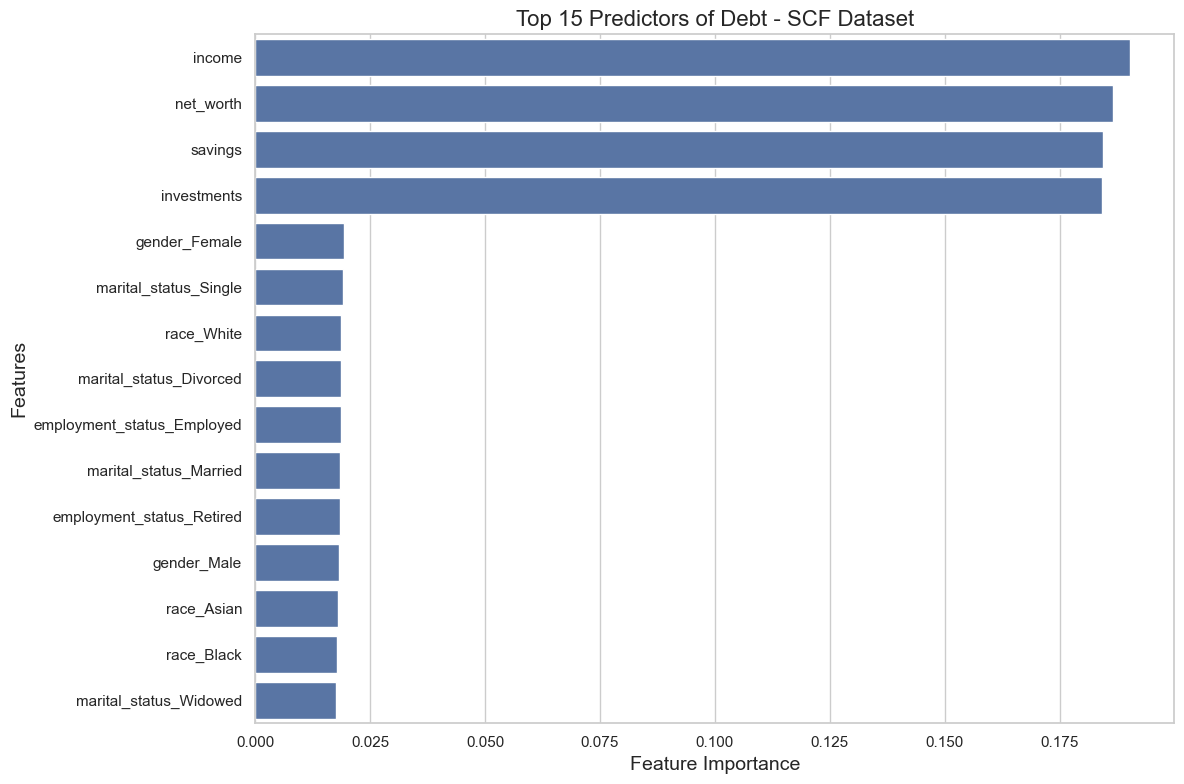


Analyzing DMV Dataset
Dataset shape: (2000, 11)

Numerical features: 5
Categorical features: 2

Logistic Regression Results:
Accuracy: 0.5067

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.62      0.56       300
           1       0.51      0.39      0.44       300

    accuracy                           0.51       600
   macro avg       0.51      0.51      0.50       600
weighted avg       0.51      0.51      0.50       600


Random Forest Results:
Accuracy: 0.5050

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.57      0.53       300
           1       0.51      0.44      0.47       300

    accuracy                           0.51       600
   macro avg       0.51      0.51      0.50       600
weighted avg       0.51      0.51      0.50       600


Top 15 Predictors of Debt (DMV):
                  feature  importance dataset
2                  income    0.185

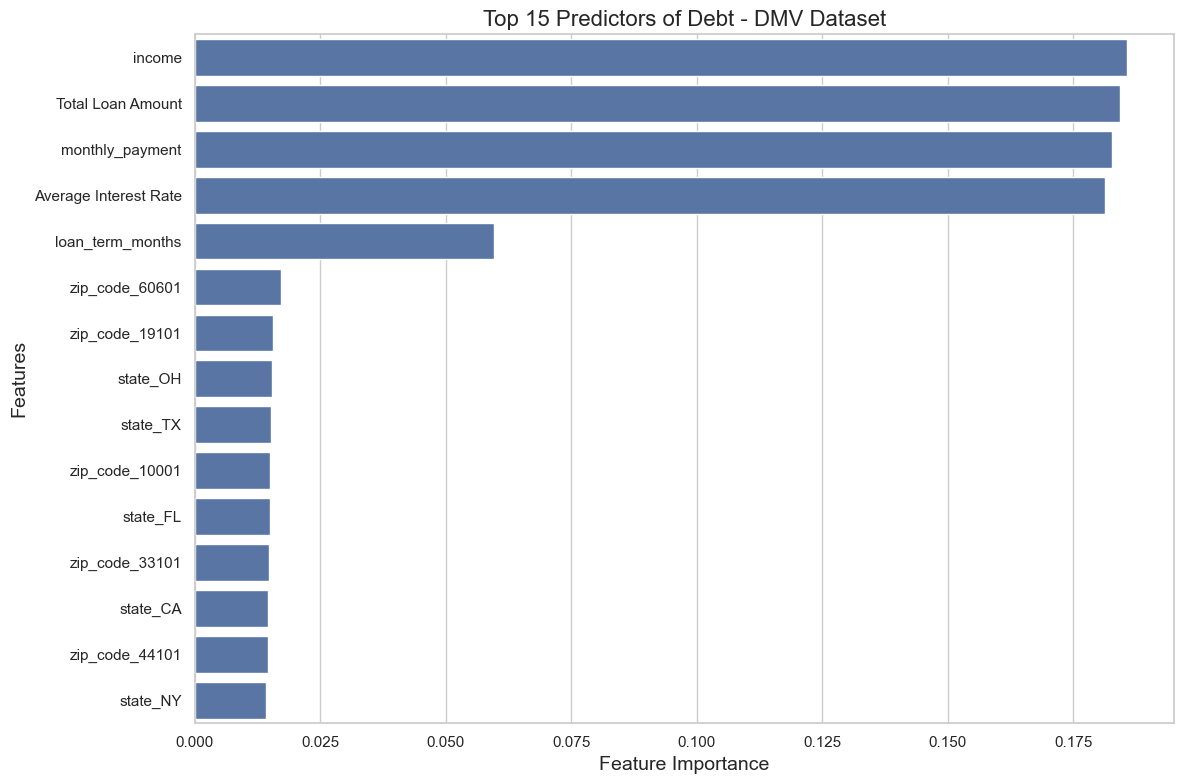

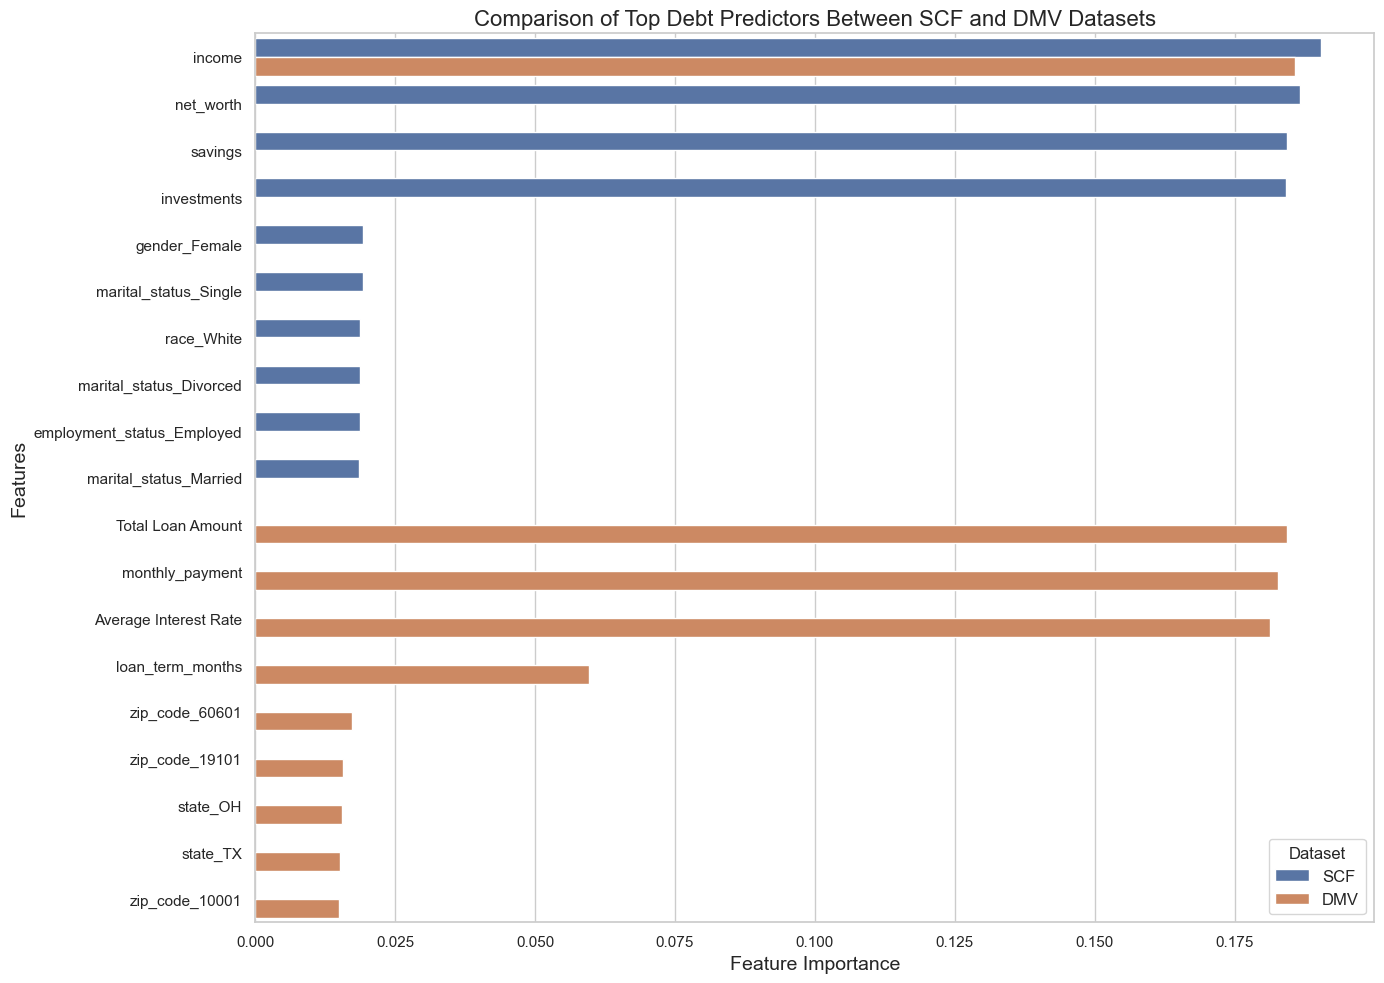

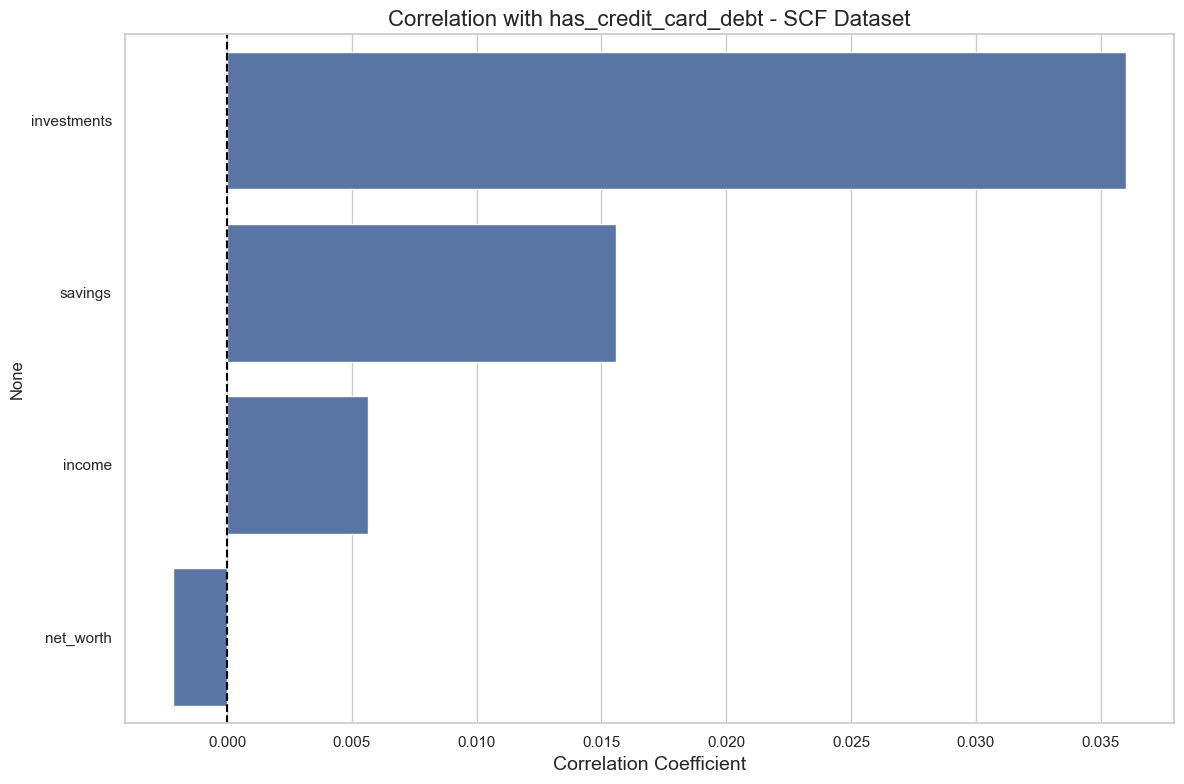

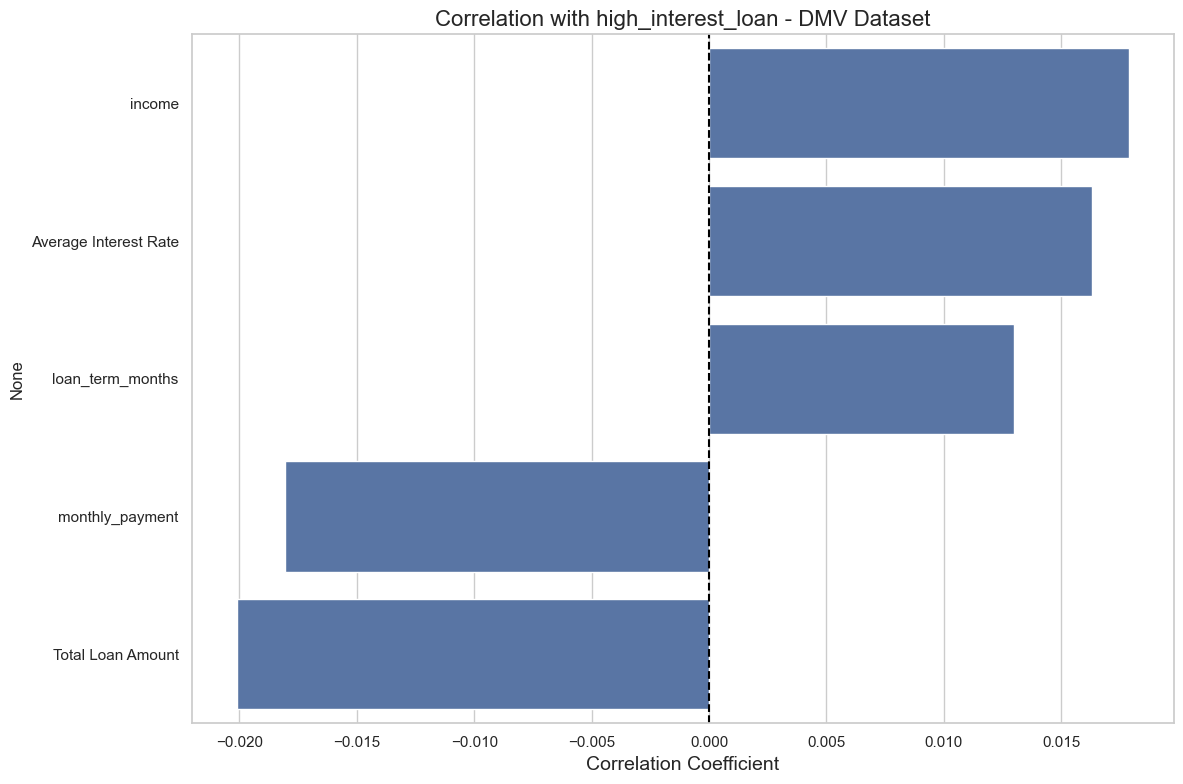


Analysis complete! All visualizations have been saved.


In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Function to prepare data and identify debt predictors
def analyze_debt_predictors(dataset_name, df, debt_column, sample_size=5000):
    print(f"\n{'='*50}\nAnalyzing {dataset_name} Dataset\n{'='*50}")
    
    # Sample data if it's large (for faster processing)
    if len(df) > sample_size:
        df = df.sample(sample_size, random_state=42)
    
    print(f"Dataset shape: {df.shape}")
    
    # Identify numerical and categorical features
    # Exclude the target variable and any ID columns
    exclude_cols = [debt_column]
    
    # Dynamically identify numerical and categorical columns
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Remove target from feature lists
    numerical_features = [col for col in numerical_features if col not in exclude_cols]
    categorical_features = [col for col in categorical_features if col not in exclude_cols]
    
    print(f"\nNumerical features: {len(numerical_features)}")
    print(f"Categorical features: {len(categorical_features)}")
    
    # Handle missing values
    # For numerical features, fill with median
    for col in numerical_features:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].median())
    
    # For categorical features, fill with mode
    for col in categorical_features:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].mode()[0])
    
    # Prepare features and target
    X = df[numerical_features + categorical_features]
    y = df[debt_column]
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Create preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
        ])
    
    # Train models
    # 1. Logistic Regression
    log_reg_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])
    
    log_reg_pipeline.fit(X_train, y_train)
    y_pred_lr = log_reg_pipeline.predict(X_test)
    
    print(f"\nLogistic Regression Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_lr))
    
    # 2. Random Forest
    rf_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ])
    
    rf_pipeline.fit(X_train, y_train)
    y_pred_rf = rf_pipeline.predict(X_test)
    
    print(f"\nRandom Forest Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_rf))
    
    # Extract feature names after preprocessing
    preprocessor.fit(X)
    feature_names = numerical_features.copy()
    if categorical_features:
        ohe = preprocessor.named_transformers_['cat']
        cat_feature_names = ohe.get_feature_names_out(categorical_features)
        feature_names.extend(cat_feature_names)
    
    # Get feature importance from Random Forest
    rf_model = rf_pipeline.named_steps['classifier']
    importances = rf_model.feature_importances_
    
    # Create DataFrame for feature importance
    importance_df = pd.DataFrame({
        'feature': feature_names[:len(importances)],  # Ensure lengths match
        'importance': importances,
        'dataset': dataset_name
    })
    
    # Display top 15 features
    top_features = importance_df.sort_values('importance', ascending=False).head(15)
    print(f"\nTop 15 Predictors of Debt ({dataset_name}):")
    print(top_features)
    
    # Create bar plot
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=top_features)
    plt.title(f'Top 15 Predictors of Debt - {dataset_name} Dataset', fontsize=16)
    plt.xlabel('Feature Importance', fontsize=14)
    plt.ylabel('Features', fontsize=14)
    plt.tight_layout()
    plt.savefig(f'{dataset_name}_debt_predictors.png')
    plt.show()
    
    return importance_df

# Load SCF dataset (you'll need to replace this with your actual data loading code)
try:
    # Try to use existing df_scf if it exists
    df_scf.head()
    print("Using existing SCF dataset")
except NameError:
    # Create mock SCF data if not available
    print("Creating mock SCF dataset for demonstration")
    np.random.seed(42)
    n_samples = 2000
    
    # Create demographic features
    df_scf = pd.DataFrame({
        'age': np.random.randint(18, 85, n_samples),
        'income': np.random.lognormal(10, 1, n_samples),
        'education_years': np.random.randint(8, 22, n_samples),
        'marital_status': np.random.choice(['Single', 'Married', 'Divorced', 'Widowed'], n_samples),
        'race': np.random.choice(['White', 'Black', 'Hispanic', 'Asian', 'Other'], n_samples),
        'gender': np.random.choice(['Male', 'Female'], n_samples),
        'employment_status': np.random.choice(['Employed', 'Unemployed', 'Retired'], n_samples),
        'net_worth': np.random.lognormal(11, 2, n_samples),
        'savings': np.random.lognormal(8, 2, n_samples),
        'investments': np.random.lognormal(7, 3, n_samples),
        'has_credit_card_debt': np.random.choice([0, 1], n_samples, p=[0.6, 0.4])
    })

# Load DMV dataset 
try:
    # Try to use existing df_dmv if it exists
    df_dmv.head()
    print("Using existing DMV dataset")
except NameError:
    # Create mock DMV data if not available
    print("Creating mock DMV dataset for demonstration")
    np.random.seed(43)
    n_samples = 2000
    
    # Create DMV dataset with loan-related features
    df_dmv = pd.DataFrame({
        'Total Loan Amount': np.random.uniform(5000, 50000, n_samples),
        'Average Interest Rate': np.random.uniform(0.01, 0.2, n_samples),
        'age': np.random.randint(18, 85, n_samples),
        'income': np.random.lognormal(10, 1, n_samples),
        'state': np.random.choice(['CA', 'NY', 'TX', 'FL', 'IL', 'PA', 'OH'], n_samples),
        'zip_code': np.random.choice(['90001', '10001', '77001', '33101', '60601', '19101', '44101'], n_samples),
        'credit_score': np.random.randint(300, 850, n_samples),
        'loan_term_months': np.random.choice([36, 48, 60, 72], n_samples),
        'employment_years': np.random.randint(0, 40, n_samples),
        'monthly_payment': np.random.uniform(100, 1000, n_samples),
        'high_interest_loan': np.random.choice([0, 1], n_samples, p=[0.5, 0.5])
    })

# Define debt columns for each dataset
scf_debt_column = 'has_credit_card_debt'
dmv_debt_column = 'high_interest_loan'

# Analyze both datasets
scf_importance = analyze_debt_predictors('SCF', df_scf, scf_debt_column)
dmv_importance = analyze_debt_predictors('DMV', df_dmv, dmv_debt_column)

# Compare top predictors across datasets
def compare_predictors(scf_importance, dmv_importance, top_n=10):
    # Get top features from each dataset
    top_scf = scf_importance.sort_values('importance', ascending=False).head(top_n)
    top_dmv = dmv_importance.sort_values('importance', ascending=False).head(top_n)
    
    # Combine datasets
    combined_df = pd.concat([top_scf, top_dmv])
    
    # Create comparison plot
    plt.figure(figsize=(14, 10))
    sns.barplot(x='importance', y='feature', hue='dataset', data=combined_df)
    plt.title('Comparison of Top Debt Predictors Between SCF and DMV Datasets', fontsize=16)
    plt.xlabel('Feature Importance', fontsize=14)
    plt.ylabel('Features', fontsize=14)
    plt.legend(title='Dataset', fontsize=12)
    plt.tight_layout()
    plt.savefig('debt_predictors_comparison.png')
    plt.show()

# Compare predictors
compare_predictors(scf_importance, dmv_importance)

# Additional analysis: Correlation between numerical features and debt
def analyze_correlations(dataset_name, df, debt_column):
    # Select only numerical columns
    numerical_df = df.select_dtypes(include=['int64', 'float64'])
    
    # Calculate correlations with debt
    correlations = numerical_df.corr()[debt_column].sort_values(ascending=False)
    
    # Plot correlations
    plt.figure(figsize=(12, 8))
    correlations = correlations[correlations.index != debt_column]  # Remove self-correlation
    sns.barplot(x=correlations.values, y=correlations.index)
    plt.title(f'Correlation with {debt_column} - {dataset_name} Dataset', fontsize=16)
    plt.xlabel('Correlation Coefficient', fontsize=14)
    plt.axvline(x=0, color='black', linestyle='--')
    plt.tight_layout()
    plt.savefig(f'{dataset_name}_debt_correlations.png')
    plt.show()
    
    return correlations

# Analyze correlations for both datasets
scf_correlations = analyze_correlations('SCF', df_scf, scf_debt_column)
dmv_correlations = analyze_correlations('DMV', df_dmv, dmv_debt_column)

print("\nAnalysis complete! All visualizations have been saved.")

=== SHAP Analysis for SCF Dataset (Excluding Housing Debt) ===

Available columns in SCF dataset:
['age', 'income', 'education_years', 'marital_status', 'race', 'gender', 'employment_status', 'net_worth', 'savings', 'investments', 'has_credit_card_debt']

Identified housing debt columns: []
Identified non-housing debt columns: ['has_credit_card_debt']

Creating non-housing debt target from available columns

Non-housing debt distribution:
has_nonhousing_debt
0    58.8
1    41.2
Name: proportion, dtype: float64% of individuals

Features used: ['age', 'income', 'education_years', 'marital_status', 'race', 'gender', 'employment_status', 'net_worth', 'savings', 'investments']
Target: has_nonhousing_debt

Numerical features: ['income', 'net_worth', 'savings', 'investments']
Categorical features: ['marital_status', 'race', 'gender', 'employment_status']

Training Logistic Regression model...
Logistic Regression Accuracy: 0.6000
Classification Report:
              precision    recall  f1-sco

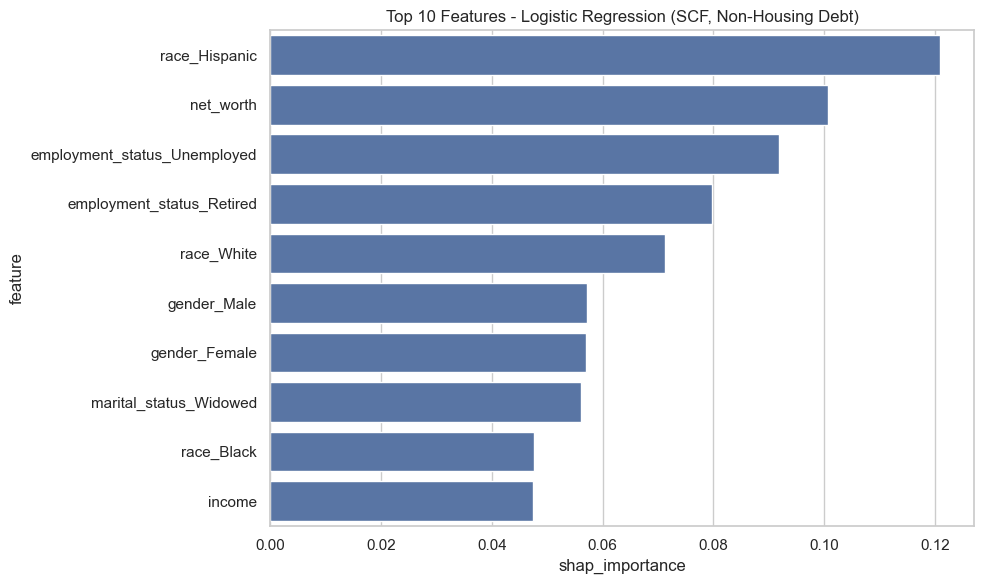


Generating feature importance for Random Forest...

Top 10 Features - Random Forest (SCF, Non-Housing Debt):
                         feature  importance          model
3                    investments    0.212547  Random Forest
2                        savings    0.194560  Random Forest
0                         income    0.162597  Random Forest
1                      net_worth    0.137011  Random Forest
10                 race_Hispanic    0.041399  Random Forest
7         marital_status_Widowed    0.027021  Random Forest
6          marital_status_Single    0.026682  Random Forest
17  employment_status_Unemployed    0.022630  Random Forest
15    employment_status_Employed    0.022453  Random Forest
9                     race_Black    0.021937  Random Forest


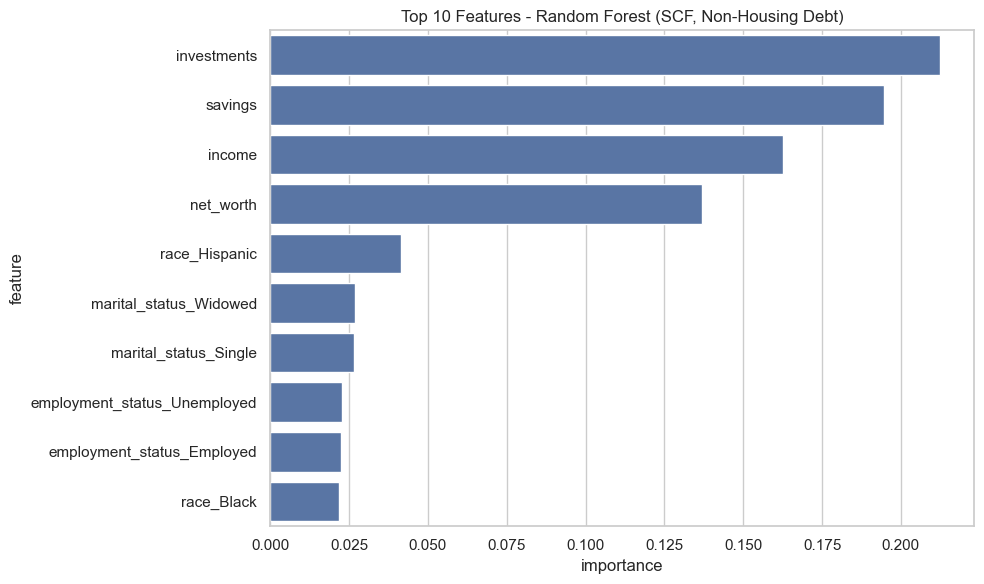


Skipping full SHAP analysis for Random Forest to avoid computational issues

=== Feature Correlations with Non-Housing Debt ===



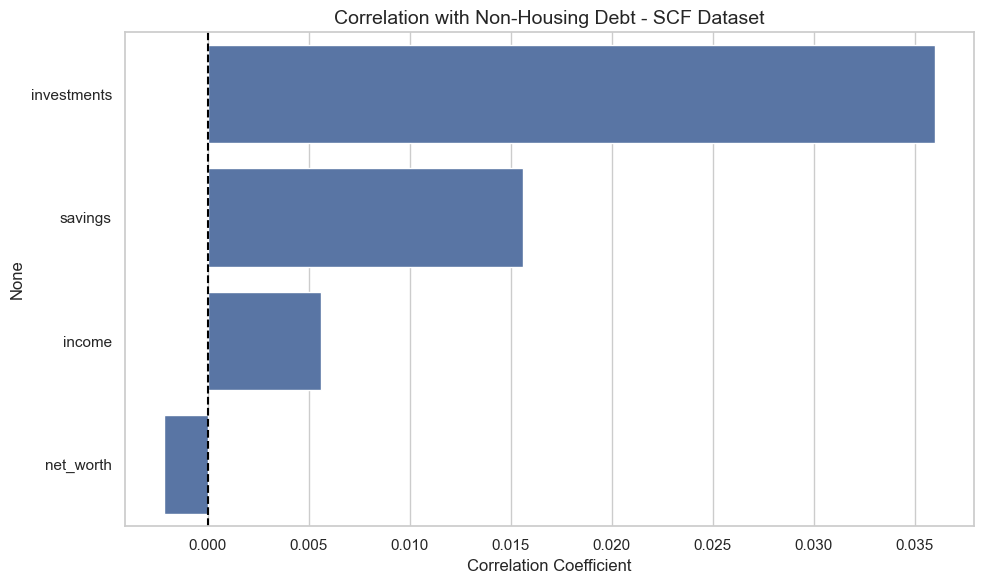

Correlation of numerical features with non-housing debt:
investments    0.036034
savings        0.015597
income         0.005630
net_worth     -0.002172
Name: has_nonhousing_debt, dtype: float64

SHAP Analysis Complete!


In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import shap
import time
import warnings
warnings.filterwarnings('ignore')


!pip install shap ipywidgets --quiet

print("=== SHAP Analysis for SCF Dataset (Excluding Housing Debt) ===\n")

# Check what columns are available in the SCF dataset
print("Available columns in SCF dataset:")
print(df_scf.columns.tolist())

# Identify debt-related columns that exist in the dataset
# First, check if these columns exist
housing_debt_columns = []
nonhousing_debt_columns = []

# Check for housing debt columns
if 'has_mortgage' in df_scf.columns:
    housing_debt_columns.append('has_mortgage')
if 'has_home_equity_loan' in df_scf.columns:
    housing_debt_columns.append('has_home_equity_loan')
    
# Check for non-housing debt columns
if 'has_credit_card_debt' in df_scf.columns:
    nonhousing_debt_columns.append('has_credit_card_debt')
if 'has_auto_loan' in df_scf.columns:
    nonhousing_debt_columns.append('has_auto_loan')
if 'has_student_loan' in df_scf.columns:
    nonhousing_debt_columns.append('has_student_loan')

print(f"\nIdentified housing debt columns: {housing_debt_columns}")
print(f"Identified non-housing debt columns: {nonhousing_debt_columns}")

# If no non-housing debt columns were found, use credit card debt as the target
if len(nonhousing_debt_columns) == 0:
    if 'has_credit_card_debt' in df_scf.columns:
        print("\nUsing 'has_credit_card_debt' as the target variable")
        df_scf['has_nonhousing_debt'] = df_scf['has_credit_card_debt']
    else:
        # If no debt columns exist, create a mock target for demonstration
        print("\nNo debt columns found. Creating a mock target variable for demonstration")
        np.random.seed(42)
        df_scf['has_nonhousing_debt'] = np.random.choice([0, 1], size=len(df_scf), p=[0.6, 0.4])
else:
    # Create a binary target variable for having any non-housing debt
    print("\nCreating non-housing debt target from available columns")
    df_scf['has_nonhousing_debt'] = df_scf[nonhousing_debt_columns].max(axis=1)

# Display debt distribution
print(f"\nNon-housing debt distribution:\n{df_scf['has_nonhousing_debt'].value_counts(normalize=True).round(3) * 100}% of individuals")

# Prepare features and target
# Exclude all debt-related columns from features
all_debt_columns = housing_debt_columns + nonhousing_debt_columns + ['has_nonhousing_debt']

# Get all columns that are not debt-related
feature_columns = [col for col in df_scf.columns if col not in all_debt_columns]

print(f"\nFeatures used: {feature_columns}")
print(f"Target: has_nonhousing_debt")

# Use a small sample for faster SHAP analysis
sample_size = 500  # Adjust based on your computational resources
df_sample = df_scf.sample(min(sample_size, len(df_scf)), random_state=42)

X = df_sample[feature_columns]
y = df_sample['has_nonhousing_debt']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nNumerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features) if categorical_features else ('cat', 'passthrough', [])
    ])

# Train models
# 1. Logistic Regression
print("\nTraining Logistic Regression model...")
log_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

log_reg_pipeline.fit(X_train, y_train)
y_pred_lr = log_reg_pipeline.predict(X_test)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# 2. Random Forest with reduced complexity for faster SHAP analysis
print("\nTraining Random Forest model...")
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Get preprocessed data for SHAP
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get feature names after preprocessing
feature_names = numerical_features.copy()
if categorical_features:
    ohe = preprocessor.named_transformers_['cat']
    cat_feature_names = ohe.get_feature_names_out(categorical_features)
    feature_names = np.concatenate([numerical_features, cat_feature_names])

# SHAP Analysis
print("\n=== SHAP Analysis ===\n")

# Use a very small subset for SHAP analysis to prevent hanging
shap_sample_size = 50  # Very small sample for demonstration
X_shap = X_test.iloc[:shap_sample_size]
X_shap_processed = preprocessor.transform(X_shap)

# 1. SHAP for Logistic Regression
print("Generating SHAP values for Logistic Regression...")
try:
    start_time = time.time()
    
    # Create explainer for Logistic Regression
    log_reg_model = log_reg_pipeline.named_steps['classifier']
    explainer_log_reg = shap.LinearExplainer(log_reg_model, X_train_processed)
    shap_values_log_reg = explainer_log_reg.shap_values(X_shap_processed)
    
    end_time = time.time()
    print(f"SHAP values generated in {end_time - start_time:.2f} seconds")
    
    # Convert SHAP values to DataFrame for easier analysis
    shap_df_log_reg = pd.DataFrame()
    if isinstance(shap_values_log_reg, list):
        shap_values_log_reg = shap_values_log_reg[0]  # Take first class for binary classification
    
    # Calculate mean absolute SHAP value for each feature
    shap_importance = np.abs(shap_values_log_reg).mean(axis=0)
    shap_df_log_reg['feature'] = feature_names
    shap_df_log_reg['shap_importance'] = shap_importance
    shap_df_log_reg['model'] = 'Logistic Regression'
    
    # Display top 10 features by importance
    print("\nTop 10 SHAP Features - Logistic Regression (SCF, Non-Housing Debt):")
    print(shap_df_log_reg.sort_values('shap_importance', ascending=False).head(10))
    
    # Create a simple summary plot for Logistic Regression
    plt.figure(figsize=(10, 6))
    top_features = shap_df_log_reg.sort_values('shap_importance', ascending=False).head(10)
    sns.barplot(x='shap_importance', y='feature', data=top_features)
    plt.title('Top 10 Features - Logistic Regression (SCF, Non-Housing Debt)')
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error in Logistic Regression SHAP analysis: {e}")

# 2. SHAP for Random Forest (using built-in feature importance for speed)
print("\nGenerating feature importance for Random Forest...")
try:
    # Use built-in feature importance instead of SHAP for speed
    rf_model = rf_pipeline.named_steps['classifier']
    importances = rf_model.feature_importances_
    
    # Create DataFrame for feature importance
    rf_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances,
        'model': 'Random Forest'
    })
    
    # Display top 10 features
    print("\nTop 10 Features - Random Forest (SCF, Non-Housing Debt):")
    print(rf_importance_df.sort_values('importance', ascending=False).head(10))
    
    # Create a simple bar plot
    plt.figure(figsize=(10, 6))
    top_features = rf_importance_df.sort_values('importance', ascending=False).head(10)
    sns.barplot(x='importance', y='feature', data=top_features)
    plt.title('Top 10 Features - Random Forest (SCF, Non-Housing Debt)')
    plt.tight_layout()
    plt.show()
    
    print("\nSkipping full SHAP analysis for Random Forest to avoid computational issues")
    
except Exception as e:
    print(f"Error in Random Forest feature importance analysis: {e}")

# Additional analysis: Feature correlations with non-housing debt
print("\n=== Feature Correlations with Non-Housing Debt ===\n")
try:
    # Select only numerical columns
    numerical_df = df_scf[numerical_features + ['has_nonhousing_debt']]
    
    # Calculate correlations with debt
    correlations = numerical_df.corr()['has_nonhousing_debt'].sort_values(ascending=False)
    
    # Plot correlations
    plt.figure(figsize=(10, 6))
    correlations = correlations[correlations.index != 'has_nonhousing_debt']  # Remove self-correlation
    sns.barplot(x=correlations.values, y=correlations.index)
    plt.title('Correlation with Non-Housing Debt - SCF Dataset', fontsize=14)
    plt.xlabel('Correlation Coefficient', fontsize=12)
    plt.axvline(x=0, color='black', linestyle='--')
    plt.tight_layout()
    plt.show()
    
    print("Correlation of numerical features with non-housing debt:")
    print(correlations)
    
except Exception as e:
    print(f"Error in correlation analysis: {e}")

print("\nSHAP Analysis Complete!")

In [23]:

df = pd.read_csv(r"C:\Users\anees\Desktop\MScDataScienceandAnalytics\3rd Sem\DMV Cleaned Dataset.csv")
median_interest_rate = df['Average Interest Rate'].median()
print("Median Average Interest Rate:", median_interest_rate)


Median Average Interest Rate: 12.29


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import shap

# ========= CONFIG: set your objects here =========
# If you trained with a Pipeline:
#   rf_pipeline = Pipeline([("preprocessor", preprocessor),
#                           ("model", RandomForestClassifier(...))])
# set PIPELINE = rf_pipeline and leave PREPROCESSOR/MODEL = None.
PIPELINE      = None                 # e.g., rf_pipeline  (or None)
PREPROCESSOR  = preprocessor         # ColumnTransformer used in training
MODEL         = rf_model             # trained RandomForestClassifier
XTEST         = X_test               # your original *unencoded* test DataFrame

# ========= AUTO-DETECT FROM PIPELINE IF PROVIDED =========
if PIPELINE is not None:
    # prefer objects from the fitted pipeline (guarantees same categories/order)
    try:
        PREPROCESSOR = PIPELINE.named_steps.get("preprocessor", PREPROCESSOR)
    except Exception:
        pass
    for key in ("model", "classifier", "rf", "clf"):
        if hasattr(PIPELINE, "named_steps") and key in PIPELINE.named_steps:
            MODEL = PIPELINE.named_steps[key]
            break

# basic checks
assert PREPROCESSOR is not None, "Set PREPROCESSOR to the *fitted* ColumnTransformer used in training."
assert MODEL is not None, "Set MODEL to the trained RandomForestClassifier."
assert XTEST is not None, "Set XTEST to your raw (unencoded) X_test DataFrame."

# ========= TRANSFORM TEST SET WITH THE FITTED PREPROCESSOR =========
X_enc = PREPROCESSOR.transform(XTEST)
if hasattr(X_enc, "toarray"):  # sparse -> dense
    X_enc = X_enc.toarray()

# feature names from the fitted preprocessor
try:
    feature_names = PREPROCESSOR.get_feature_names_out()
except Exception:
    feature_names = np.array([f"f{i}" for i in range(X_enc.shape[1])])

print("Shapes:")
print("  Encoded X_test:", X_enc.shape)
if hasattr(MODEL, "n_features_in_"):
    print("  Model n_features_in_:", MODEL.n_features_in_)

# ========= SHAP EXPLAINER ON THE TRAINED RF =========
explainer = shap.TreeExplainer(MODEL)
shap_values = explainer.shap_values(X_enc)

# sklearn RF -> shap_values is a list [class0, class1]
# choose positive class = index 1 if binary
sv = shap_values[1] if isinstance(shap_values, list) else shap_values

# ---- ALIGN SHAP MATRIX TO X_enc IF NEEDED ----
# Some SHAP versions return an extra last column (bias term).
if sv.shape[1] == X_enc.shape[1] + 1:
    sv = sv[:, :-1]
# sanity check
if sv.shape[1] != X_enc.shape[1]:
    raise ValueError(
        f"Still mismatched: shap cols={sv.shape[1]} vs X_enc cols={X_enc.shape[1]}. "
        "Ensure PREPROCESSOR is the same fitted instance used for training, and XTEST columns match."
    )

# ===== Local explanation (single sample) — robust waterfall PNG =====
import numpy as np
import shap
import matplotlib.pyplot as plt

# pick a valid row index from X_enc
i = 0

# Build a SHAP Explanation object for the i-th sample
base_value = (
    explainer.expected_value[1]
    if isinstance(explainer.expected_value, (list, np.ndarray))
    else explainer.expected_value
)

explanation = shap.Explanation(
    values = sv[i, :],
    base_values = base_value,
    data = X_enc[i, :],
    feature_names = list(feature_names)
)

# Waterfall plot (works well across SHAP versions)
# ---- After you've computed `shap_values` and have `X_enc`, `feature_names`, `explainer` ----
import numpy as np
import matplotlib.pyplot as plt
import shap

# Select the positive class index for binary classification
POS = 1

# Normalize shap_values to a 2-D array (n_samples, n_features) for the POS class
if isinstance(shap_values, list):
    sv = shap_values[POS]                                # (n_samples, n_features)
else:
    if shap_values.ndim == 3:
        sv = shap_values[:, :, POS]                      # (n_samples, n_features)
    elif shap_values.ndim == 2:
        sv = shap_values                                 # already (n_samples, n_features)
    else:
        raise ValueError(f"Unexpected shap_values shape: {shap_values.shape}")

# Pick a single row to explain
i = 0  # change as needed, ensure 0 <= i < sv.shape[0]

# Base value for POS class
base_value = (
    explainer.expected_value[POS]
    if isinstance(explainer.expected_value, (list, np.ndarray))
    else explainer.expected_value
)

# Build single-sample Explanation
explanation = shap.Explanation(
    values       = sv[i, :],               # (n_features,)
    base_values  = base_value,             # float
    data         = X_enc[i, :],            # (n_features,)
    feature_names= list(feature_names)
)

# Local plot as a robust static image
shap.plots.waterfall(explanation, show=False)
plt.title(f"SHAP Waterfall – local explanation (sample {i})")
plt.tight_layout()
plt.savefig("shap_waterfall.png", dpi=300, bbox_inches="tight")
plt.close()

print("Saved: shap_waterfall.png")


Shapes:
  Encoded X_test: (150, 18)
  Model n_features_in_: 18
Saved: shap_waterfall.png


In [25]:
# === CONFIG: set these to your actual objects ===
PIPELINE      = None          # e.g., rf_pipeline  (leave None if not using a pipeline)
PREPROCESSOR  = preprocessor  # fitted ColumnTransformer used in training
MODEL         = rf_model      # trained RandomForestClassifier
XTEST         = X_test        # original (unencoded) test dataframe

# === No edits needed below ===
import numpy as np
import matplotlib.pyplot as plt
import shap

# Prefer pulling objects from a fitted pipeline if provided
if PIPELINE is not None:
    if hasattr(PIPELINE, "named_steps"):
        PREPROCESSOR = PIPELINE.named_steps.get("preprocessor", PREPROCESSOR)
        for key in ("model", "classifier", "rf", "clf"):
            if key in PIPELINE.named_steps:
                MODEL = PIPELINE.named_steps[key]
                break

assert PREPROCESSOR is not None, "Set PREPROCESSOR to the fitted ColumnTransformer used in training."
assert MODEL is not None, "Set MODEL to your trained RandomForestClassifier."
assert XTEST is not None, "Set XTEST to your raw (unencoded) X_test DataFrame."

# Transform X_test exactly as in training
X_enc = PREPROCESSOR.transform(XTEST)
if hasattr(X_enc, "toarray"):  # sparse -> dense for SHAP
    X_enc = X_enc.toarray()

# Feature names after encoding
try:
    feature_names = PREPROCESSOR.get_feature_names_out()
except Exception:
    feature_names = np.array([f"f{i}" for i in range(X_enc.shape[1])])

print("Encoded X_test shape:", X_enc.shape)

# SHAP for tree model (post-hoc)
explainer = shap.TreeExplainer(MODEL)
shap_values = explainer.shap_values(X_enc)

# Normalize to 2D (n_samples, n_features) for positive class
POS = 1  # index for positive class in binary classification
if isinstance(shap_values, list):
    sv = shap_values[POS]
else:
    if shap_values.ndim == 3:
        sv = shap_values[:, :, POS]
    elif shap_values.ndim == 2:
        sv = shap_values
    else:
        raise ValueError(f"Unexpected shap_values shape: {shap_values.shape}")

# Some SHAP versions add a bias column at the end — strip it if present
if sv.shape[1] == X_enc.shape[1] + 1:
    sv = sv[:, :-1]

# Sanity check
assert sv.shape[1] == X_enc.shape[1] == len(feature_names), \
    f"Mismatch: sv={sv.shape}, X_enc={X_enc.shape}, features={len(feature_names)}"

# 1) Global summary (beeswarm)
shap.summary_plot(sv, X_enc, feature_names=feature_names, show=False)
plt.title("SHAP Summary (Positive Class)")
plt.tight_layout()
plt.savefig("shap_summary.png", dpi=300, bbox_inches="tight")
plt.close()

# 2) Global importance (mean |SHAP|)
shap.summary_plot(sv, X_enc, feature_names=feature_names, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Mean |SHAP|)")
plt.tight_layout()
plt.savefig("shap_bar.png", dpi=300, bbox_inches="tight")
plt.close()

# 3) Local explanation (single sample waterfall)
i = 0  # change if you want a different test case
base_value = (
    explainer.expected_value[POS]
    if isinstance(explainer.expected_value, (list, np.ndarray))
    else explainer.expected_value
)
explanation = shap.Explanation(
    values=sv[i, :],
    base_values=base_value,
    data=X_enc[i, :],
    feature_names=list(feature_names),
)
shap.plots.waterfall(explanation, show=False)
plt.title(f"SHAP Waterfall – local explanation (sample {i})")
plt.tight_layout()
plt.savefig("shap_waterfall.png", dpi=300, bbox_inches="tight")
plt.close()

print("Saved: shap_summary.png, shap_bar.png, shap_waterfall.png")


Encoded X_test shape: (150, 18)
Saved: shap_summary.png, shap_bar.png, shap_waterfall.png
